# EDA

Author: Mateus Balda

In [1]:
## Import libraries

from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mne
import warnings
warnings.filterwarnings("ignore")

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_theme(style="ticks")
# sns.set_palette(sns.color_palette(colors))
sns.set_style('whitegrid')

## 1. Coleta de dados

In [2]:
df = pd.read_csv('../data/raw/EEG.machinelearing_data_BRMH.csv')
df.shape

(945, 1149)

## 2. Descrição dos dados

In [3]:
df.head()

no. sex   age    eeg.date  education     IQ       main.disorder  \
0    1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1    2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2    3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3    4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4    5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   

      specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0  Alcohol use disorder         35.998557         21.717375  ...   
1  Alcohol use disorder         13.425118         11.002916  ...   
2  Alcohol use disorder         29.941780         27.544684  ...   
3  Alcohol use disorder         21.496226         21.846832  ...   
4  Alcohol use disorder         37.775667         33.607679  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0              55.989192              16.739679              23.452271   
1              45.595619              17.510824              26.777368   
2              99.475453              70.654171              39.131547   
3              59.986561              63.822201              36.478254   
4              61.462720              59.166097              51.465531   

   COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0              45.678820              30.167520              16.918761   
1              28.201062              57.108861              32.375401   
2              69.920996              71.063644              38.534505   
3              47.117006              84.658376              24.724096   
4              58.635415              80.685608              62.138436   

   COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0              48.850427               9.422630              34.507082   
1              60.351749              13.900981              57.831848   
2              69.908764              27.180532              64.803155   
3              50.299349              35.319695              79.822944   
4              75.888749              61.003944              87.455509   

   COH.F.gamma.r.O1.s.O2  
0              28.613029  
1              43.463261  
2              31.485799  
3              41.141873  
4              70.531662  

[5 rows x 1149 columns]

In [4]:
patients_info = df.loc[:,'sex':'specific.disorder']
patients_info

sex   age    eeg.date  education     IQ       main.disorder  \
0     M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1     M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2     M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3     M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4     M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ..   ...         ...        ...    ...                 ...   
940   M  22.0   2014.8.28       13.0  116.0     Healthy control   
941   M  26.0   2014.9.19       13.0  118.0     Healthy control   
942   M  26.0   2014.9.27       16.0  113.0     Healthy control   
943   M  24.0   2014.9.20       13.0  107.0     Healthy control   
944   M  21.0  2015.10.23       13.0  105.0     Healthy control   

        specific.disorder  
0    Alcohol use disorder  
1    Alcohol use disorder  
2    Alcohol use disorder  
3    Alcohol use disorder  
4    Alcohol use disorder  
..                    ...  
940       Healthy control  
941       Healthy control  
942       Healthy control  
943       Healthy control  
944       Healthy control  

[945 rows x 7 columns]

In [5]:
patients_info.describe(include='all')

sex         age   eeg.date   education          IQ  main.disorder  \
count   945  945.000000        945  930.000000  932.000000            945   
unique    2         NaN        722         NaN         NaN              7   
top       M         NaN  2018.7.16         NaN         NaN  Mood disorder   
freq    601         NaN          5         NaN         NaN            266   
mean    NaN   30.594804        NaN   13.438710  101.580472            NaN   
std     NaN   11.781592        NaN    2.550461   17.022414            NaN   
min     NaN   18.000000        NaN    0.000000   49.000000            NaN   
25%     NaN   21.730000        NaN   12.000000   91.000000            NaN   
50%     NaN   26.150000        NaN   13.000000  102.000000            NaN   
75%     NaN   35.450000        NaN   16.000000  114.000000            NaN   
max     NaN   71.880000        NaN   20.000000  145.000000            NaN   

          specific.disorder  
count                   945  
unique                   12  
top     Depressive disorder  
freq                    199  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

### 2.1 Dicionário de dados

In [6]:
dictionary = pd.read_csv('../references/dictionary.csv')

qualitatives = dictionary[dictionary['tipo'] == 'qualitativa'].variavel.to_list()
quantitatives = dictionary[dictionary['tipo'] == 'quantitativa'].variavel.to_list()

index = qualitatives.index('eeg.date')
eeg_date = qualitatives.pop(index)

qualitatives, quantitatives, eeg_date

(['sex', 'main.disorder', 'specific.disorder'],
 ['age', 'education', 'IQ'],
 'eeg.date')

In [7]:
dictionary

variavel                                       descricao  \
0                sex                                Sexo do paciente   
1                age                               Idade do paciente   
2           eeg.date                         Data do registro do EEG   
3          education                      Anos de estudo do paciente   
4                 IQ           Quociente de inteligência do paciente   
5      main.disorder   Categoria principal do transtorno do paciente   
6  specific.disorder  Categoria específica do transtorno do paciente   

           tipo   subtipo  
0   qualitativa   nominal  
1  quantitativa  discreta  
2   qualitativa   ordinal  
3  quantitativa  discreta  
4  quantitativa  continua  
5   qualitativa   nominal  
6   qualitativa   nominal

--- 
    7 variáveis, com 4 qualitativas e 3 quantitativa; mais 1140 features ((19 canais de PSD + 171 canais de FC) * 6 bandas de frequência)
---

## 3. Dados faltantes (Nan, Null)

In [8]:
mis = df.isna().sum()
display(mis)

no.                       0
sex                       0
age                       0
eeg.date                  0
education                15
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1149, dtype: int64

In [9]:
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)

education        15
IQ               13
Unnamed: 122    945
dtype: int64

In [10]:
column = 'Unnamed: 122'

try:
    position = df.columns.get_loc(column)
    print(f"A posição da coluna '{column}' é: {position}")
except KeyError:
    print(f"A coluna '{column}' não existe no DataFrame")

A posição da coluna 'Unnamed: 122' é: 122


In [11]:
# delete columns

df = df.drop(columns=['no.', 'Unnamed: 122'])

In [12]:
# mask rows with missing values

missing_mask = df[['education', 'IQ']].isna()

true_mask = missing_mask[missing_mask == True]

filtered_df = df[true_mask.any(axis=1)]

filtered_df

sex    age    eeg.date  education     IQ  \
0     M  57.00   2012.8.30        NaN    NaN   
17    M  30.00   2013.9.27        NaN   86.0   
21    M  20.00  2014.10.23        NaN  116.0   
33    F  19.26    2013.8.5       12.0    NaN   
38    F  19.47   2014.5.26       12.0    NaN   
42    F  32.94  2014.10.16       16.0    NaN   
43    F  22.65   2014.11.8       13.0    NaN   
60    M  34.00   2016.3.10       12.0    NaN   
92    F  39.18    2017.3.3       16.0    NaN   
93    F  28.42   2017.3.20        9.0    NaN   
155   M  18.00   2013.12.7        NaN  103.0   
173   M  23.00  2015.11.14        NaN  113.0   
223   M  19.00   2016.7.12       12.0    NaN   
225   M  20.00   2016.9.13       13.0    NaN   
234   M  20.00  2017.11.22       13.0    NaN   
269   M  25.00   2015.9.23        NaN   85.0   
270   M  34.00   2015.9.21        NaN  120.0   
278   M  21.00   2016.5.13       15.0    NaN   
279   M  35.00    2016.6.2        NaN    NaN   
280   M  37.00   2016.6.27        NaN  110.0   
281   M  22.00   2016.6.30        NaN  107.0   
384   F  51.38  2011.12.27        NaN   97.0   
417   F  53.67   2013.4.18        NaN  101.0   
433   M  34.16   2013.4.11        NaN  142.0   
845   M  21.29   2013.3.25        NaN   82.0   
920   M  24.00    2013.2.1        NaN  114.0   

                          main.disorder               specific.disorder  \
0                    Addictive disorder            Alcohol use disorder   
17                   Addictive disorder            Alcohol use disorder   
21                   Addictive disorder            Alcohol use disorder   
33   Trauma and stress related disorder           Acute stress disorder   
38   Trauma and stress related disorder           Acute stress disorder   
42   Trauma and stress related disorder           Acute stress disorder   
43   Trauma and stress related disorder           Acute stress disorder   
60                   Addictive disorder            Alcohol use disorder   
92                        Mood disorder             Depressive disorder   
93                        Mood disorder             Depressive disorder   
155                  Addictive disorder   Behavioral addiction disorder   
173                     Healthy control                 Healthy control   
223                  Addictive disorder   Behavioral addiction disorder   
225                  Addictive disorder   Behavioral addiction disorder   
234                  Addictive disorder   Behavioral addiction disorder   
269       Obsessive compulsive disorder  Obsessive compulsitve disorder   
270       Obsessive compulsive disorder  Obsessive compulsitve disorder   
278       Obsessive compulsive disorder  Obsessive compulsitve disorder   
279       Obsessive compulsive disorder  Obsessive compulsitve disorder   
280       Obsessive compulsive disorder  Obsessive compulsitve disorder   
281       Obsessive compulsive disorder  Obsessive compulsitve disorder   
384                       Mood disorder             Depressive disorder   
417  Trauma and stress related disorder   Posttraumatic stress disorder   
433                    Anxiety disorder                  Panic disorder   
845                       Mood disorder                Bipolar disorder   
920                     Healthy control                 Healthy control   

     AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  ...  \
0           35.998557         21.717375        21.518280  ...   
17          12.443237         12.503703        12.015677  ...   
21          28.287190         22.412264        27.143447  ...   
33          28.675766         25.368575        25.912400  ...   
38          22.225112         32.080652        18.953387  ...   
42          13.935050         15.881887        13.005029  ...   
43           7.654964          8.817443         6.264664  ...   
60          24.662682         26.633415        10.642282  ...   
92          26.650019         22.823161        17.942133  ...   
93          14.624474         1

In [13]:
# get indices of filtered rows with missing values

filtered_indices = filtered_df.index.tolist()
filtered_indices

[0,
 17,
 21,
 33,
 38,
 42,
 43,
 60,
 92,
 93,
 155,
 173,
 223,
 225,
 234,
 269,
 270,
 278,
 279,
 280,
 281,
 384,
 417,
 433,
 845,
 920]

In [14]:
## using KNN imputer to fill missing values

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

df_imput = pd.DataFrame(knn_imputer.fit_transform(df[['education', 'IQ']]), columns=['education', 'IQ'])

# copy data imputed to original dataframe
old_df = df.copy()

df[['education', 'IQ']] = df_imput[['education', 'IQ']]

In [15]:
# check what data was imputed by knn

df_imput.loc[filtered_indices]

education          IQ
0     13.43871  101.580472
17    12.40000   86.000000
21    15.40000  116.000000
33    12.00000   80.800000
38    12.00000   80.800000
42    16.00000  114.800000
43    13.00000   89.000000
60    12.00000   80.800000
92    16.00000  114.800000
93     9.00000   98.800000
155   12.00000  103.000000
173   14.60000  113.000000
223   12.00000   80.800000
225   13.00000   89.000000
234   13.00000   89.000000
269   14.00000   85.000000
270   13.80000  120.000000
278   15.00000  104.000000
279   13.43871  101.580472
280   13.20000  110.000000
281   15.80000  107.000000
384   13.00000   97.000000
417   11.60000  101.000000
433   15.40000  142.000000
845   13.60000   82.000000
920   14.80000  114.000000

In [16]:
# check if the data was imputed correctly

(df['education'] == old_df['education']).value_counts()

education
True     930
False     15
Name: count, dtype: int64

In [17]:
# check if there are still missing values

mis = df.isna().sum().sum()
display(mis)

np.int64(0)

## 4. Dados discrepantes

In [73]:
# z-score

for col in ['age', 'education', 'IQ']:
    mean = df[col].mean()
    std = df[col].std()
    
    df[f'{col}_zscore'] = (df[col] - mean) / std

    median = df[col].median()
    df.loc[df[f'{col}_zscore'].abs() >= 3, col] = median

df.drop(columns=[f'{col}_zscore' for col in ['age', 'education', 'IQ']], inplace=True)

### IQR 

In [25]:
# IQR with median winsorizada

def treat_outliers_iqr(df, column, factor=1.5):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    print(f'{column}: lower bound = {lower_bound}, upper bound = {upper_bound}')
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    df[column] = np.clip(df[column], lower_bound, upper_bound)
        
    return _, outliers
    
for col in ['age', 'education', 'IQ']:
    treat_outliers_iqr(df, col, factor=1.5)

age: lower bound = 1.149999999999995, upper bound = 56.03000000000001
education: lower bound = 6.0, upper bound = 22.0
IQ: lower bound = 56.5, upper bound = 148.5


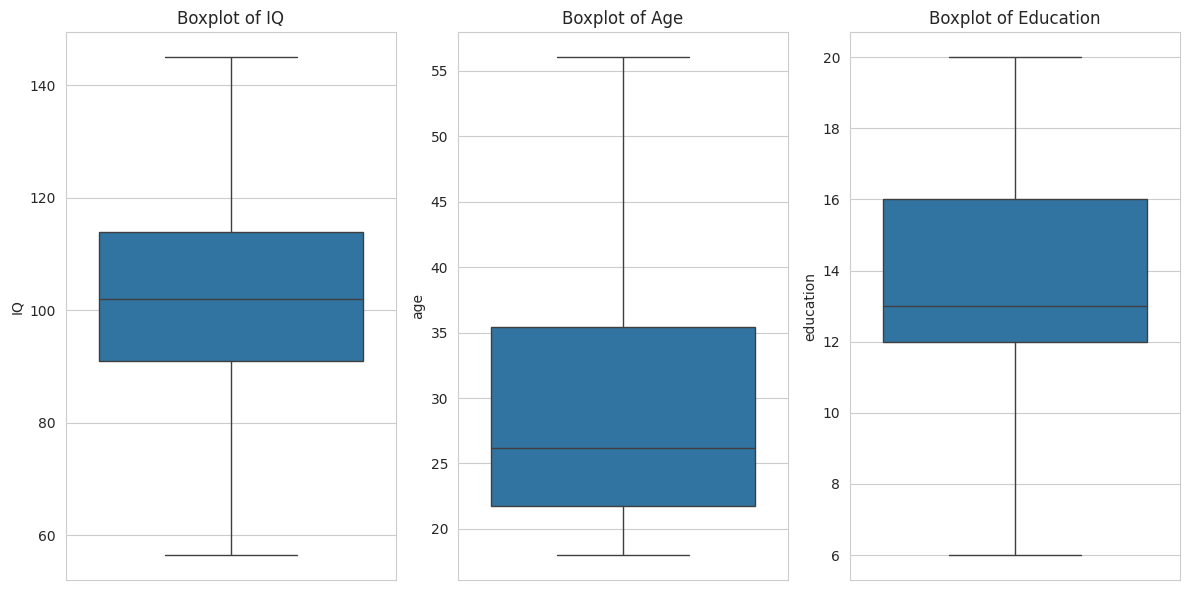

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['IQ'])
plt.title('Boxplot of IQ')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['education'])
plt.title('Boxplot of Education')

plt.tight_layout()
plt.show()

In [27]:
def replace_outliers_with_clipping(df, group_col, target_col):
    for group_name, group_data in df.groupby(group_col):
        Q1 = group_data[target_col].quantile(0.25)
        Q3 = group_data[target_col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df.loc[df[group_col] == group_name, target_col] = np.clip(
            df.loc[df[group_col] == group_name, target_col],
            lower_bound,
            upper_bound
        )

replace_outliers_with_clipping(df, 'sex', 'age')

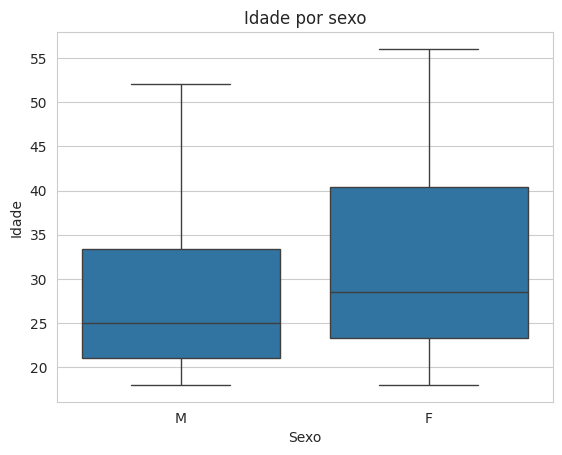

In [29]:
sns.boxplot(x='sex', y='age', data=df)
plt.title('Idade por sexo')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.show()

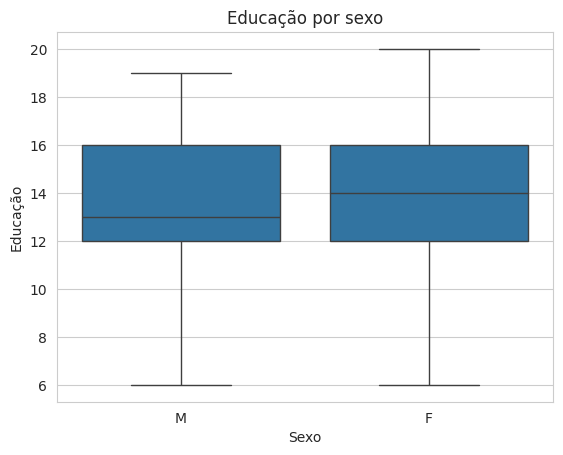

In [30]:
sns.boxplot(x='sex', y='education', data=df)
plt.title('Educação por sexo')
plt.xlabel('Sexo')
plt.ylabel('Educação')
plt.show()

In [32]:
replace_outliers_with_clipping(df, 'sex', 'IQ')

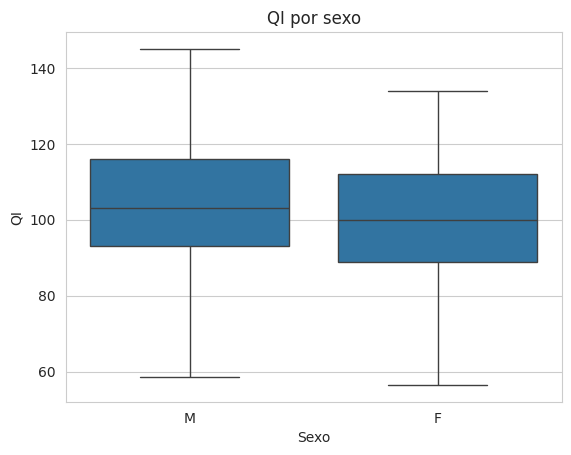

In [33]:
sns.boxplot(x='sex', y='IQ', data=df)
plt.title('QI por sexo')
plt.xlabel('Sexo')
plt.ylabel('QI')
plt.show()

In [35]:
replace_outliers_with_clipping(df, 'main.disorder', 'age')

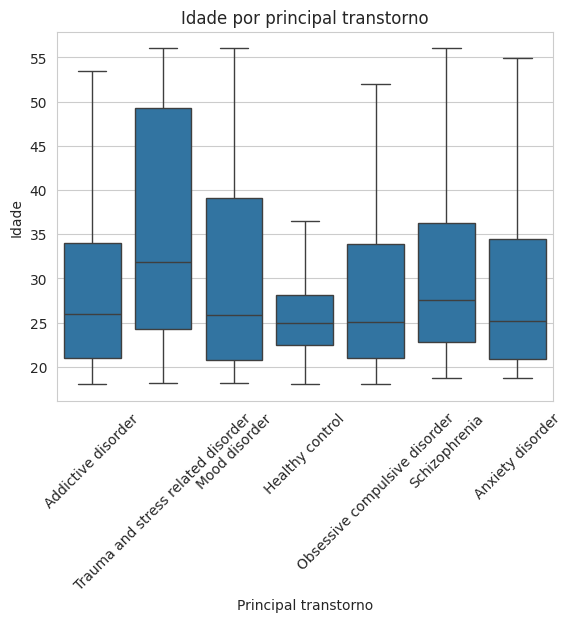

In [36]:
sns.boxplot(x='main.disorder', y='age', data=df)
plt.title('Idade por principal transtorno')
plt.xlabel('Principal transtorno')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.show()


In [38]:
replace_outliers_with_clipping(df, 'main.disorder', 'education')

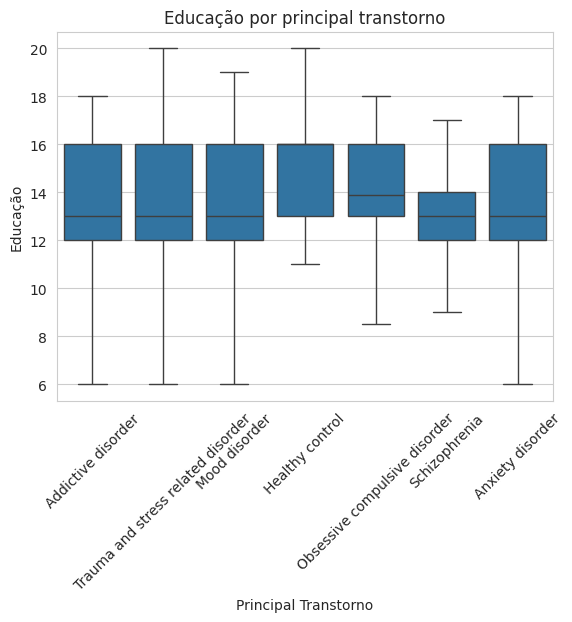

In [39]:
sns.boxplot(x='main.disorder', y='education', data=df)
plt.title('Educação por principal transtorno')
plt.xlabel('Principal Transtorno')
plt.ylabel('Educação')
plt.xticks(rotation=45)
plt.show()

In [40]:
replace_outliers_with_clipping(df, 'main.disorder', 'IQ')

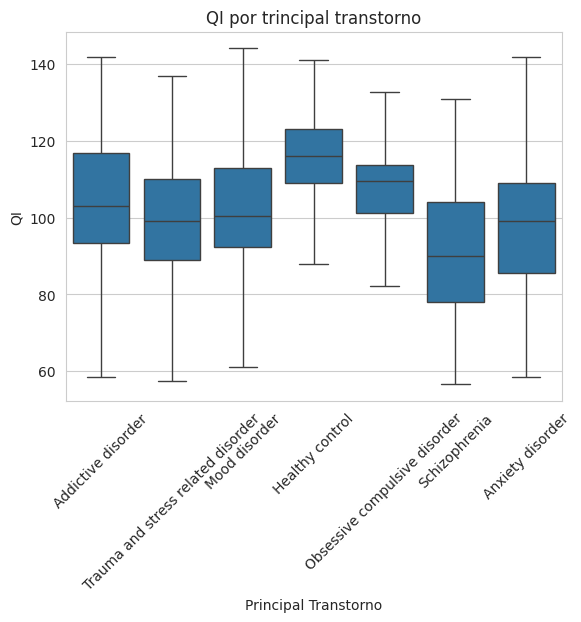

In [41]:
sns.boxplot(x='main.disorder', y='IQ', data=df)
plt.title('QI por trincipal transtorno')
plt.xlabel('Principal Transtorno')
plt.ylabel('QI')
plt.xticks(rotation=45)
plt.show()

In [42]:
replace_outliers_with_clipping(df, 'specific.disorder', 'age')

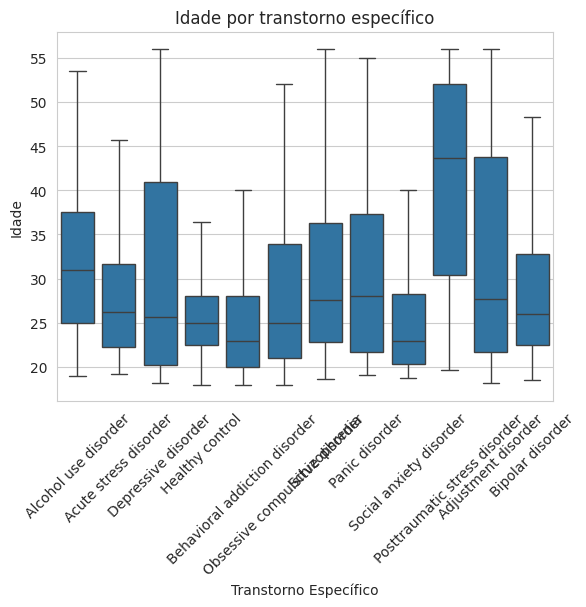

In [43]:
sns.boxplot(x='specific.disorder', y='age', data=df)
plt.title('Idade por transtorno específico')
plt.xlabel('Transtorno Específico')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.show()


In [44]:
replace_outliers_with_clipping(df, 'specific.disorder', 'education')

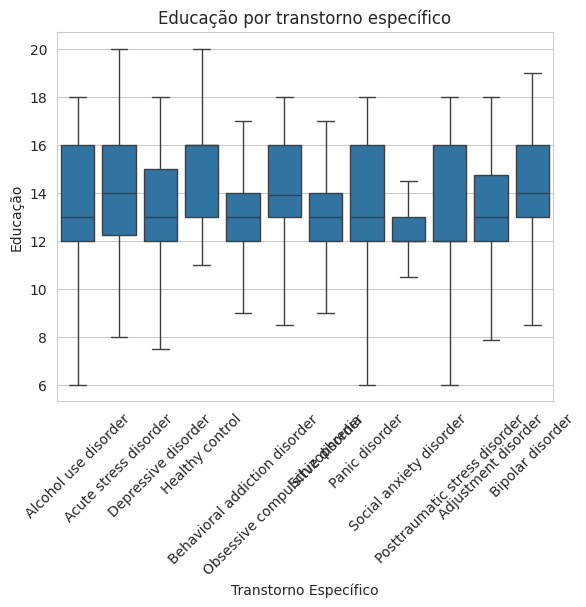

In [45]:
sns.boxplot(x='specific.disorder', y='education', data=df)
plt.title('Educação por transtorno específico')
plt.xlabel('Transtorno Específico')
plt.ylabel('Educação')
plt.xticks(rotation=45)
plt.show()

In [46]:
replace_outliers_with_clipping(df, 'specific.disorder', 'IQ')

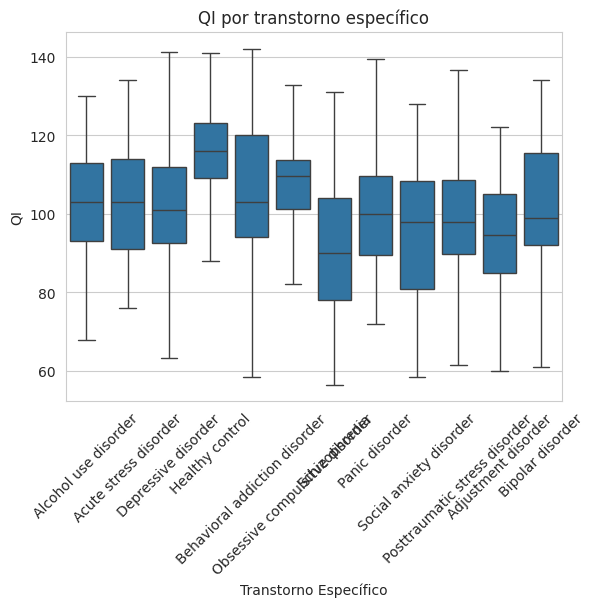

In [47]:
sns.boxplot(x='specific.disorder', y='IQ', data=df)
plt.title('QI por transtorno específico')
plt.xlabel('Transtorno Específico')
plt.ylabel('QI')
plt.xticks(rotation=45)
plt.show()

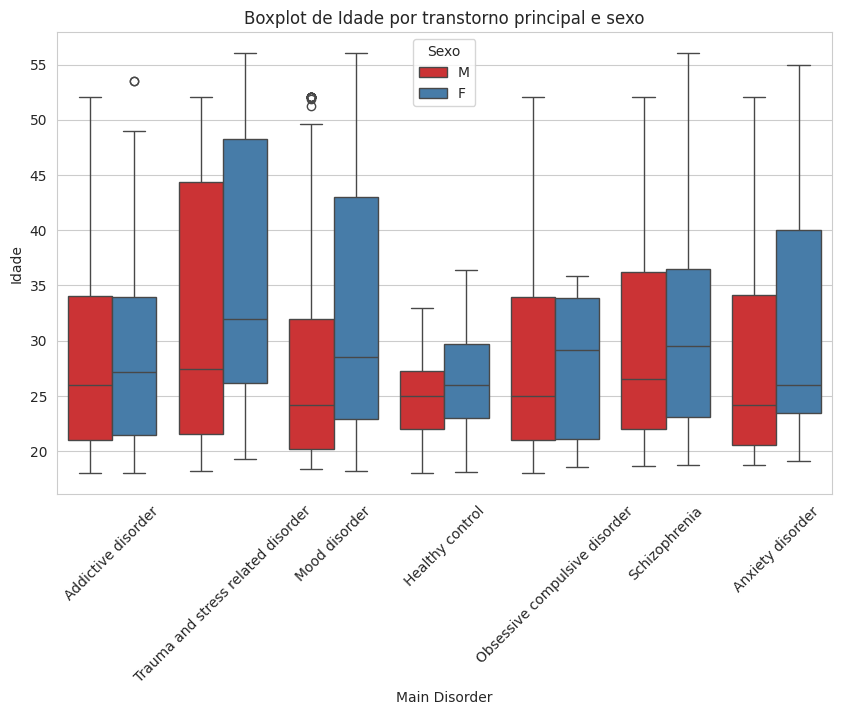

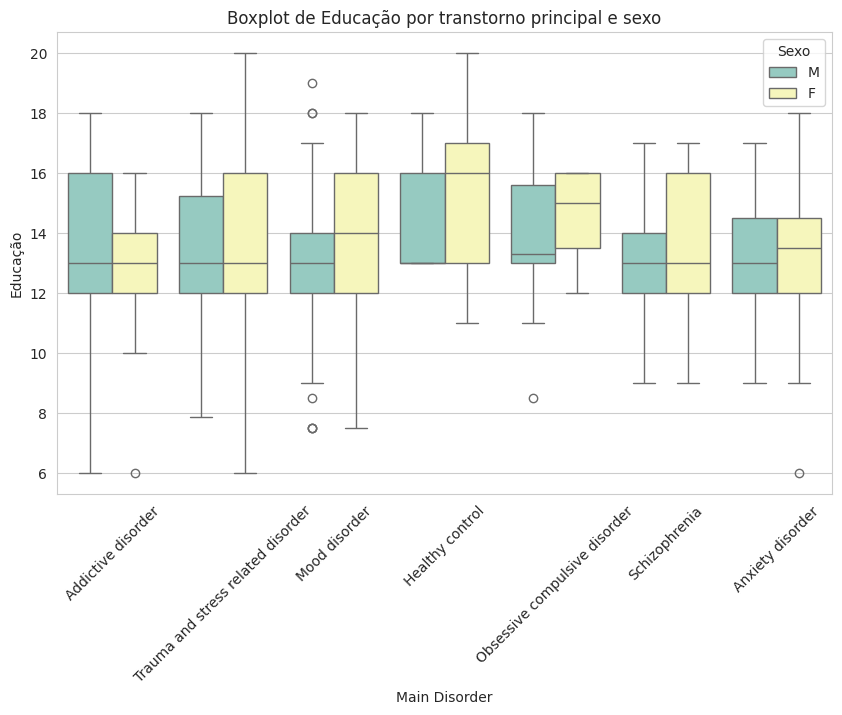

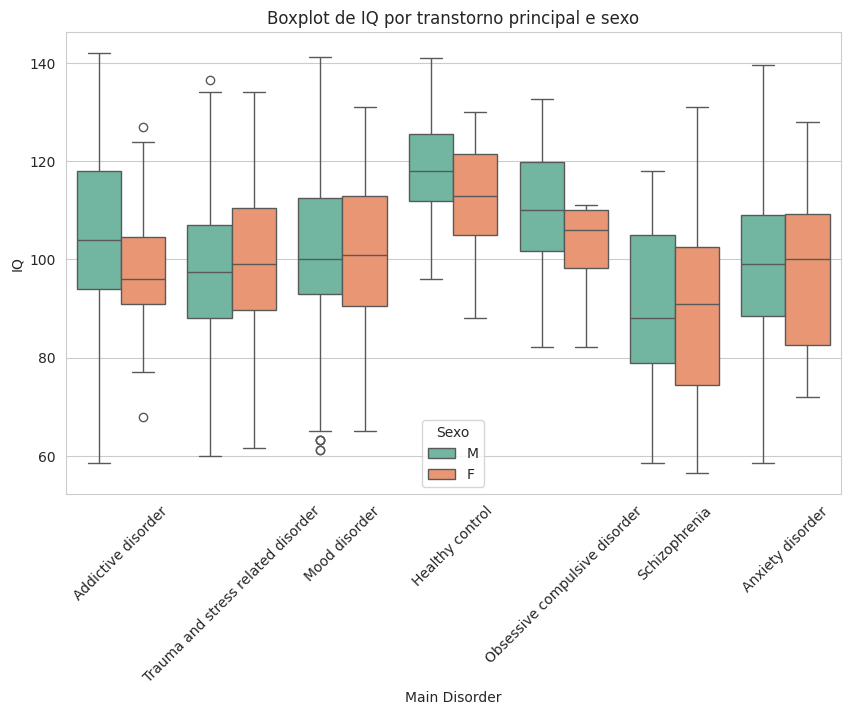

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='main.disorder', y='age', hue='sex', data=df, palette='Set1')
plt.title('Boxplot de Idade por transtorno principal e sexo')
plt.xlabel('Main Disorder')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='main.disorder', y='education', hue='sex', data=df, palette='Set3')
plt.title('Boxplot de Educação por transtorno principal e sexo')
plt.xlabel('Main Disorder')
plt.ylabel('Educação')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='main.disorder', y='IQ', hue='sex', data=df, palette='Set2')
plt.title('Boxplot de IQ por transtorno principal e sexo')
plt.xlabel('Main Disorder')
plt.ylabel('IQ')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()


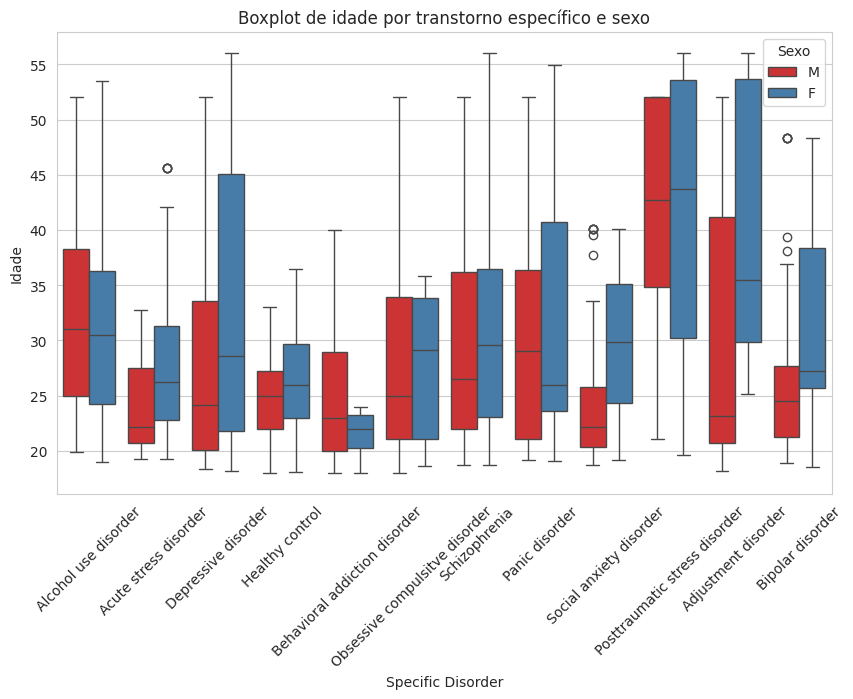

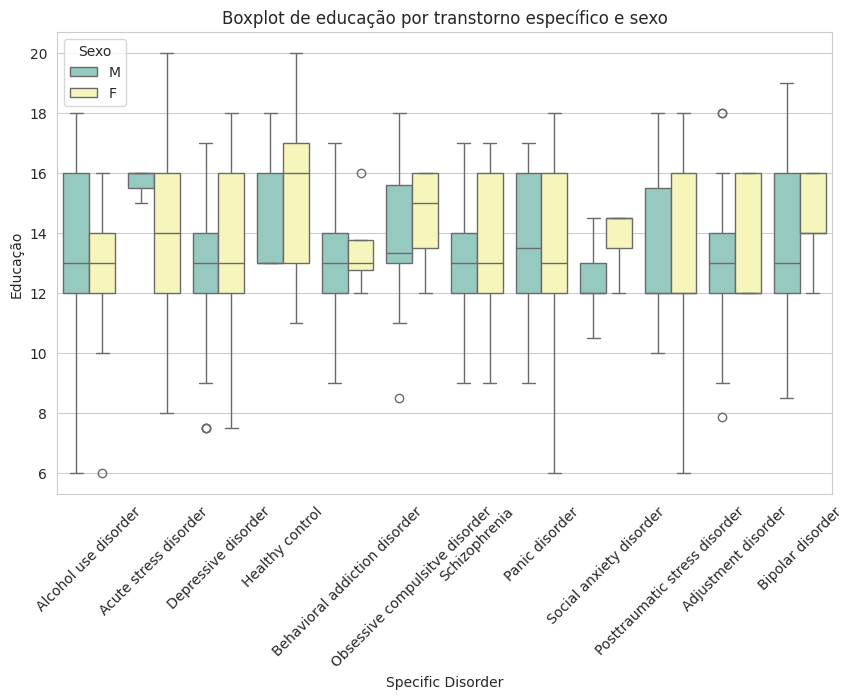

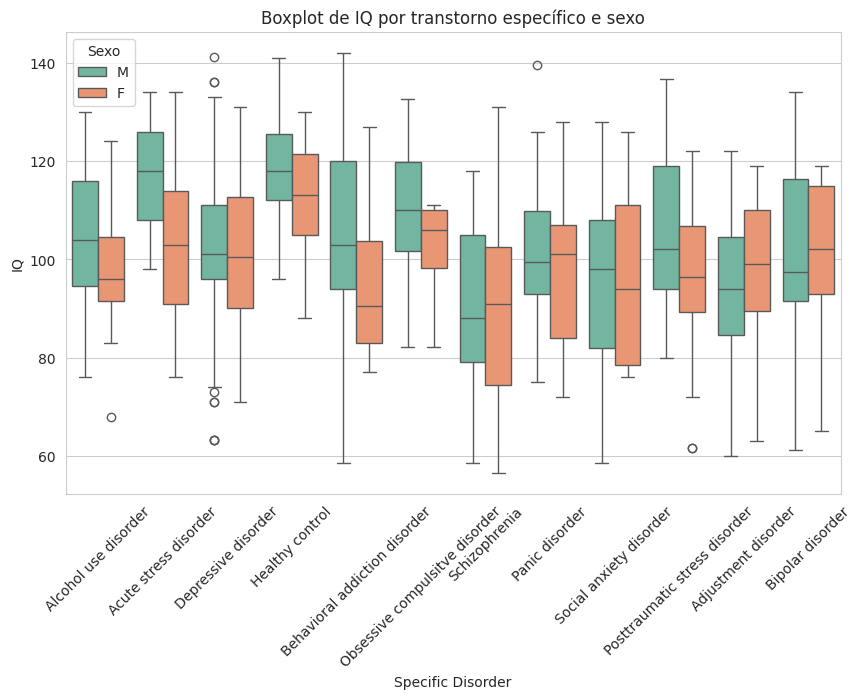

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='specific.disorder', y='age', hue='sex', data=df, palette='Set1')
plt.title('Boxplot de idade por transtorno específico e sexo')
plt.xlabel('Specific Disorder')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='specific.disorder', y='education', hue='sex', data=df, palette='Set3')
plt.title('Boxplot de educação por transtorno específico e sexo')
plt.xlabel('Specific Disorder')
plt.ylabel('Educação')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='specific.disorder', y='IQ', hue='sex', data=df, palette='Set2')
plt.title('Boxplot de IQ por transtorno específico e sexo')
plt.xlabel('Specific Disorder')
plt.ylabel('IQ')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()


In [50]:
# plt.figure(figsize=(10, 6))

# sns.boxenplot(data=df, x='specific.disorder', y='IQ', palette='Set2')

# plt.title('Distribuição de IQ por transtorno específico (Boxenplot)')
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()

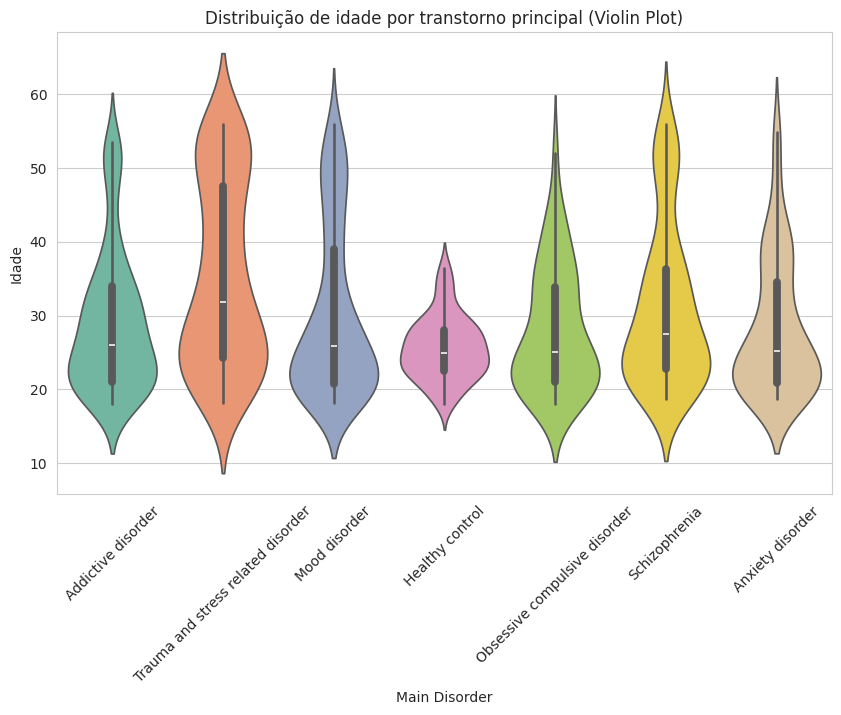

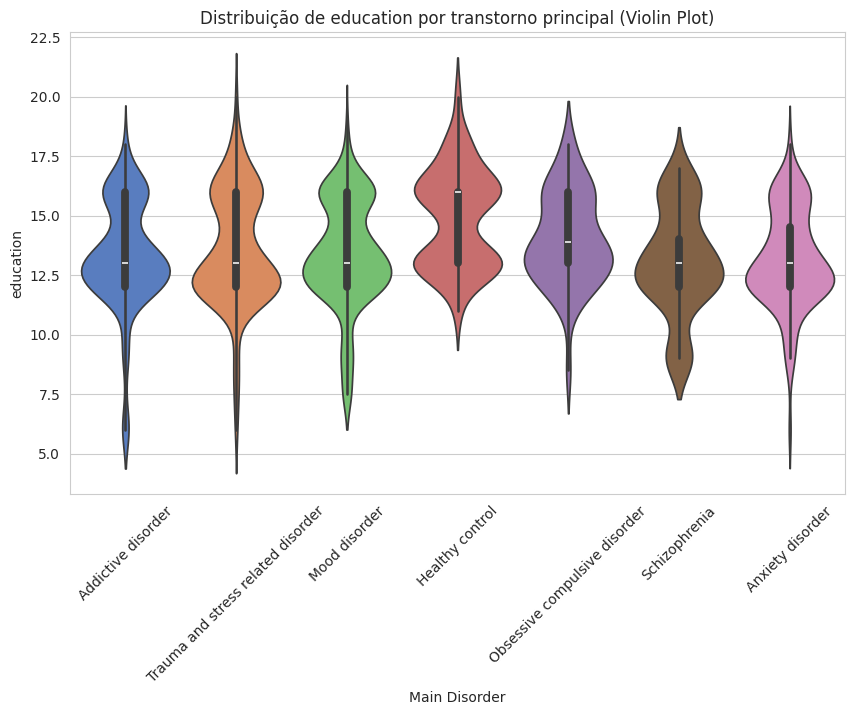

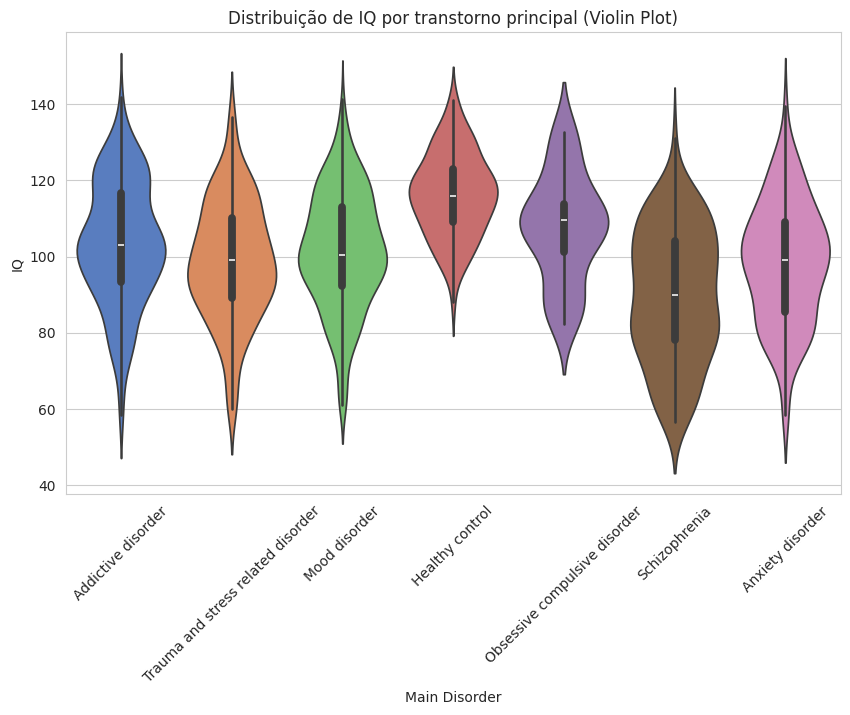

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='main.disorder', y='age', data=df, palette='Set2')

plt.title('Distribuição de idade por transtorno principal (Violin Plot)')
plt.ylabel('Idade')
plt.xlabel('Main Disorder')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='main.disorder', y='education', data=df, palette='muted')

plt.title('Distribuição de education por transtorno principal (Violin Plot)')
plt.ylabel('education')
plt.xlabel('Main Disorder')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='main.disorder', y='IQ', data=df, palette='muted')

plt.title('Distribuição de IQ por transtorno principal (Violin Plot)')
plt.ylabel('IQ')
plt.xlabel('Main Disorder')
plt.xticks(rotation=45)
plt.show()

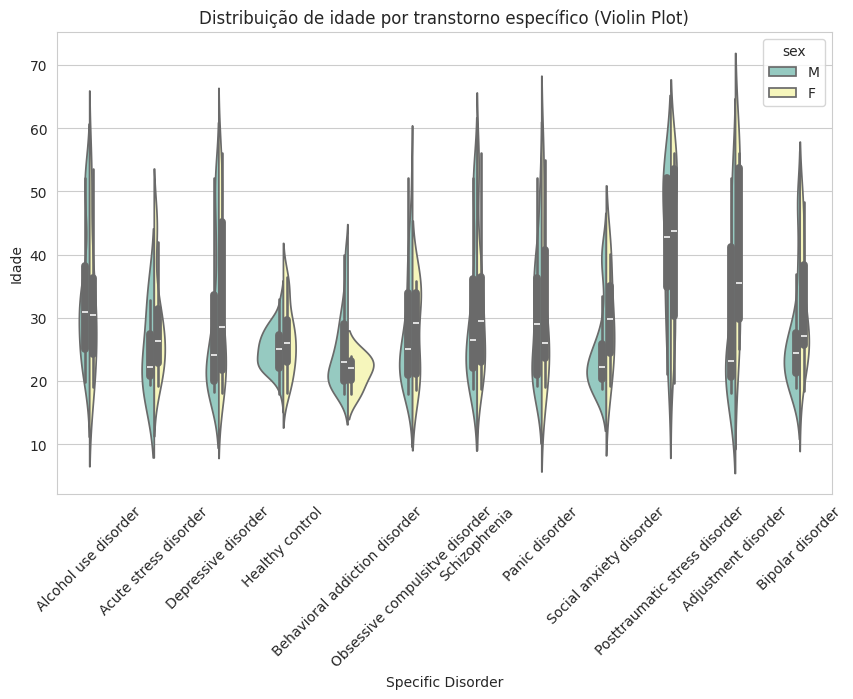

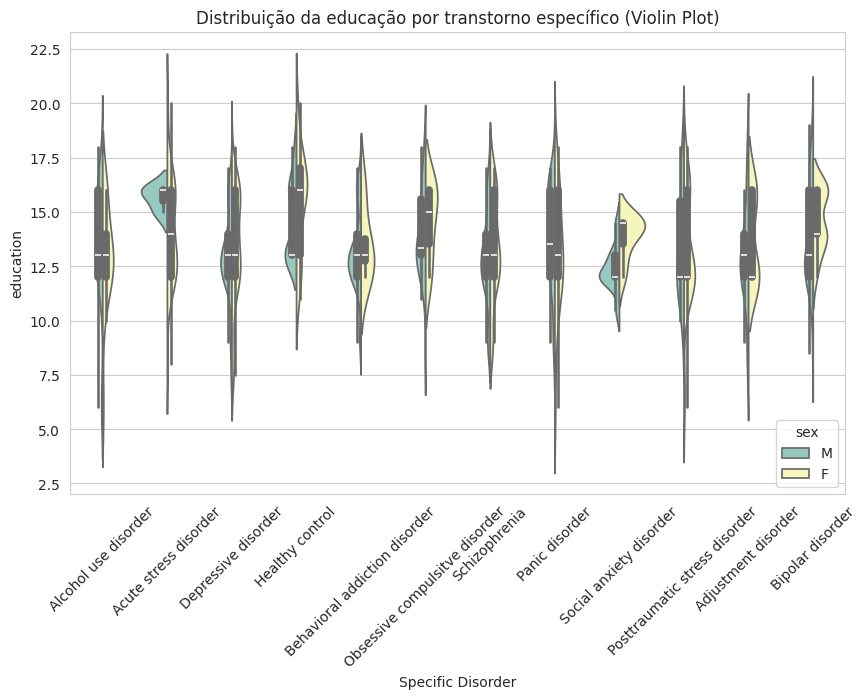

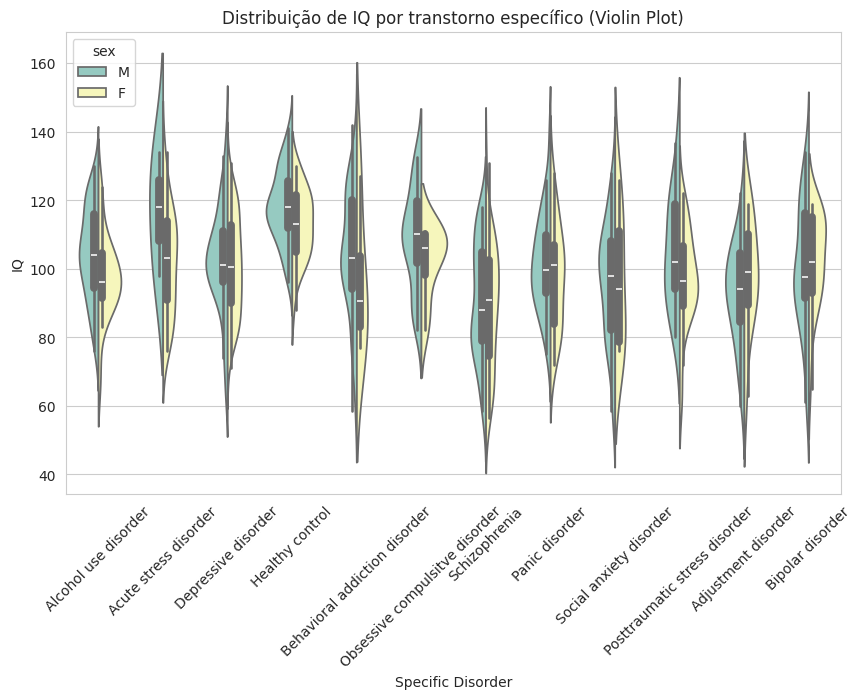

In [52]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='specific.disorder', y='age', hue='sex', data=df, palette='Set3', split=True)

plt.title('Distribuição de idade por transtorno específico (Violin Plot)')
plt.ylabel('Idade')
plt.xlabel('Specific Disorder')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='specific.disorder', y='education', hue='sex', data=df, palette='Set3', split=True)

plt.title('Distribuição da educação por transtorno específico (Violin Plot)')
plt.ylabel('education')
plt.xlabel('Specific Disorder')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='specific.disorder', y='IQ', hue='sex', data=df, palette='Set3', split=True)

plt.title('Distribuição de IQ por transtorno específico (Violin Plot)')
plt.ylabel('IQ')
plt.xlabel('Specific Disorder')
plt.xticks(rotation=45)
plt.show()

## 5. Distribuição dos transtornos principais e específicos

<Axes: xlabel='count', ylabel='main.disorder'>

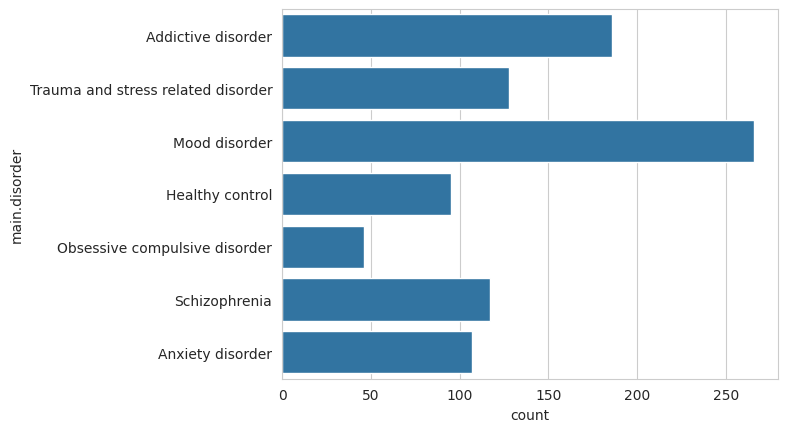

In [53]:
sns.countplot(data=patients_info, y='main.disorder')

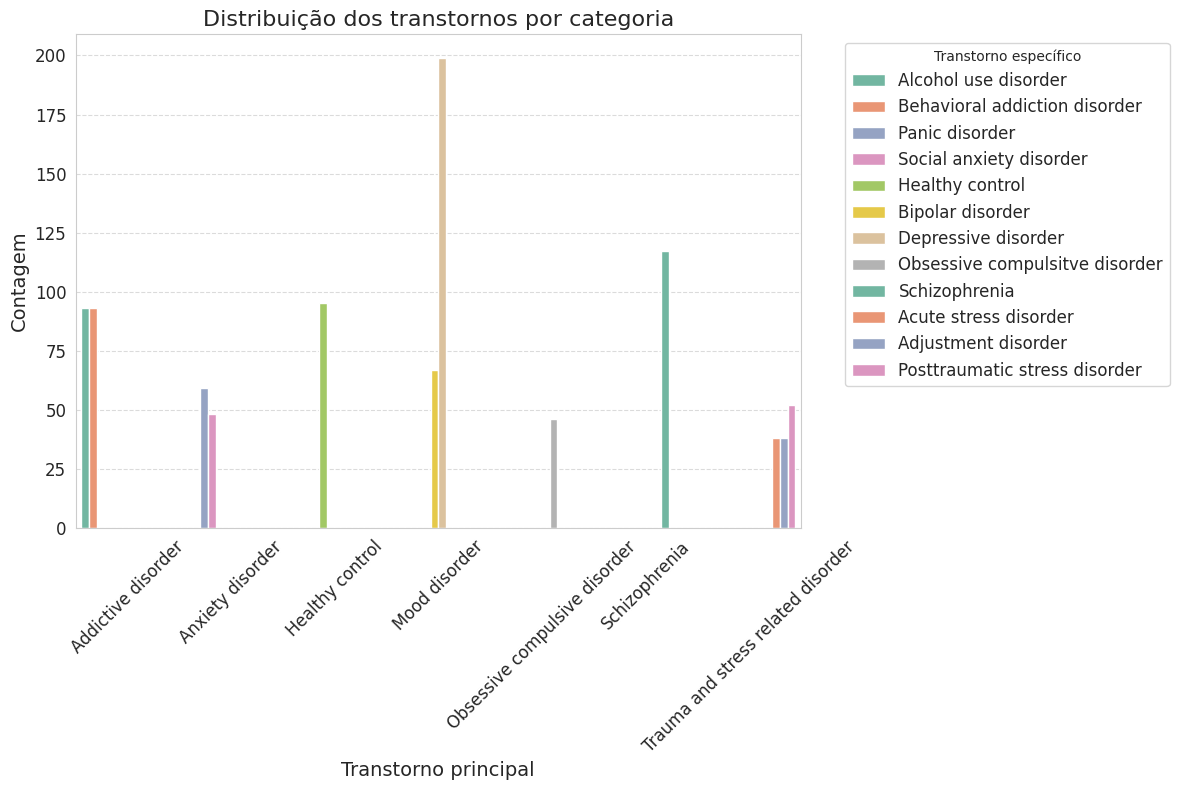

In [54]:
disorder_counts = df.groupby(['main.disorder', 'specific.disorder']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=disorder_counts, x='main.disorder', y='count', hue='specific.disorder', ci=None, palette='Set2', width=0.9)

plt.title('Distribuição dos transtornos por categoria', fontsize=16)
plt.xlabel('Transtorno principal', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.legend(title='Transtorno específico', bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [55]:
disorder_counts

main.disorder               specific.disorder  count
0                   Addictive disorder            Alcohol use disorder     93
1                   Addictive disorder   Behavioral addiction disorder     93
2                     Anxiety disorder                  Panic disorder     59
3                     Anxiety disorder         Social anxiety disorder     48
4                      Healthy control                 Healthy control     95
5                        Mood disorder                Bipolar disorder     67
6                        Mood disorder             Depressive disorder    199
7        Obsessive compulsive disorder  Obsessive compulsitve disorder     46
8                        Schizophrenia                   Schizophrenia    117
9   Trauma and stress related disorder           Acute stress disorder     38
10  Trauma and stress related disorder             Adjustment disorder     38
11  Trauma and stress related disorder   Posttraumatic stress disorder     52

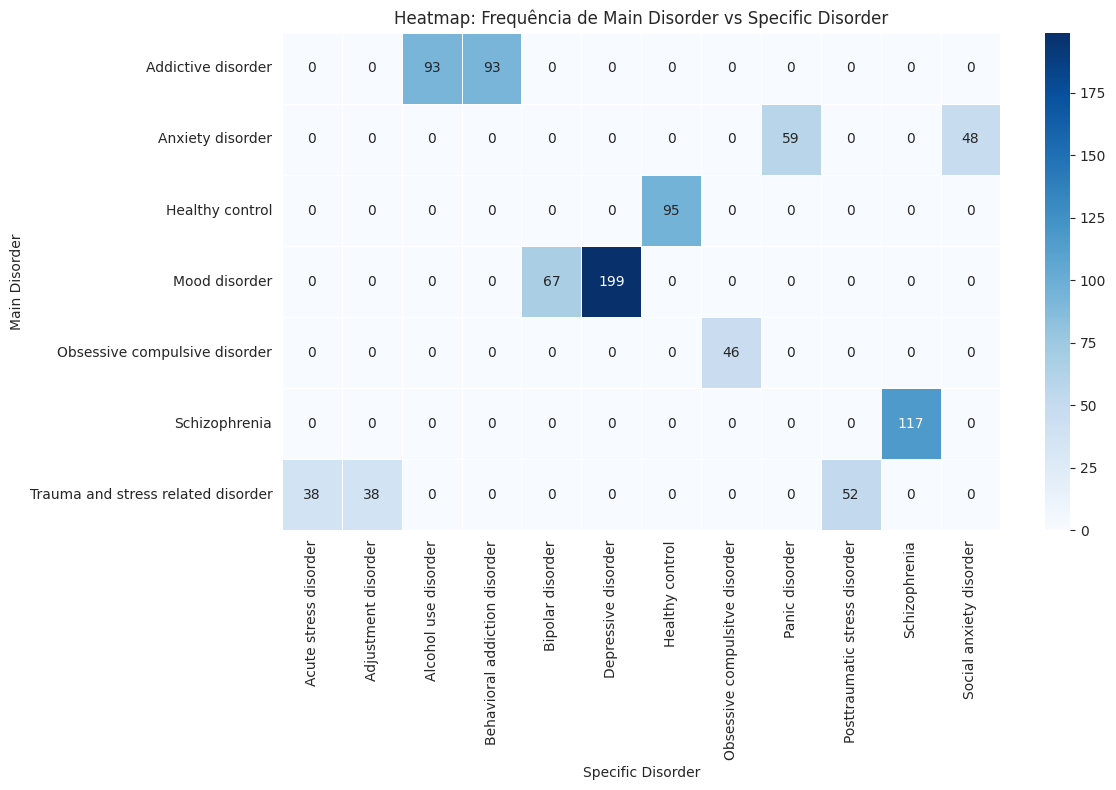

In [56]:

cross_tab = pd.crosstab(df['main.disorder'], df['specific.disorder'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Heatmap: Frequência de Main Disorder vs Specific Disorder')
plt.ylabel('Main Disorder')
plt.xlabel('Specific Disorder')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 6. Distribuição das variáveis qualitativas
`sex`, `main.disorder`, `specific.disorder`

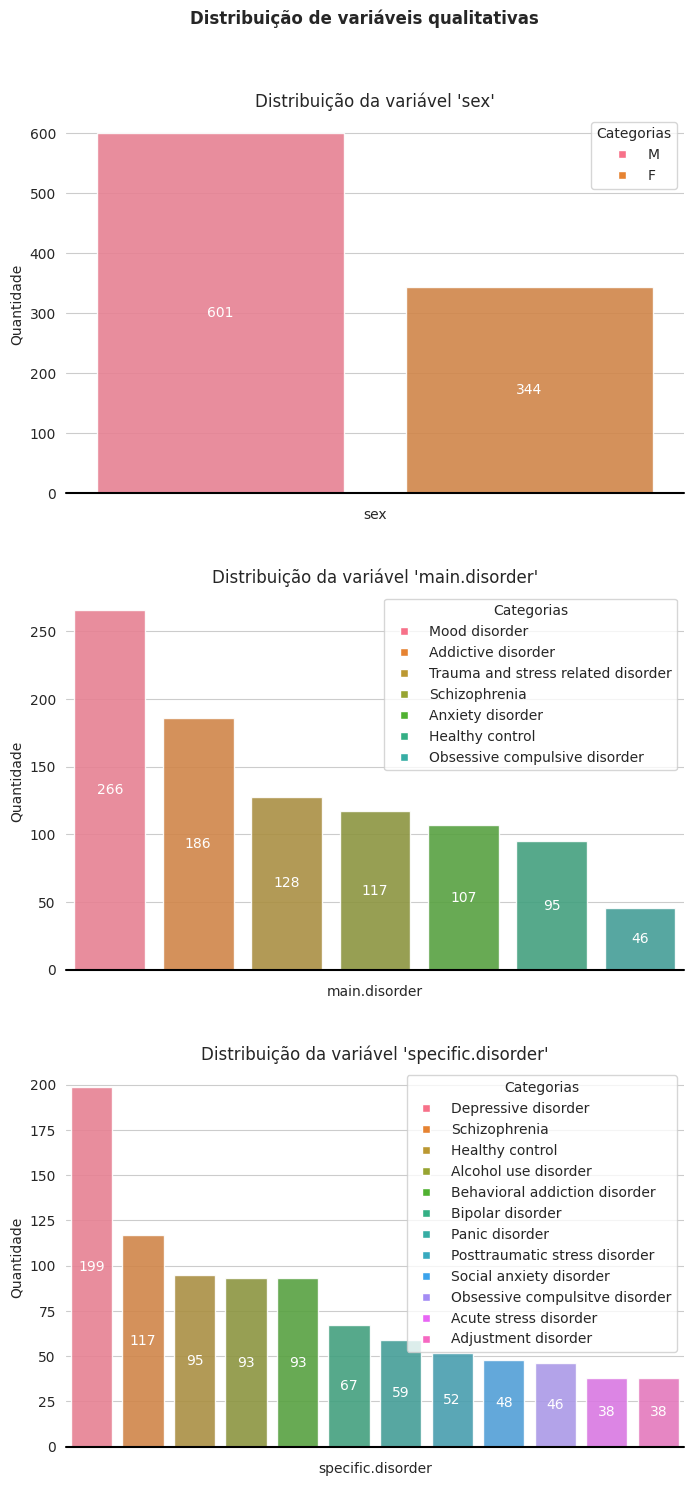

In [57]:
colors = sns.color_palette("husl", n_colors=12) 

fig, axes = plt.subplots(len(qualitatives), 1, figsize=(8, 15)) 
plt.tight_layout(pad=5.0, h_pad=5.0)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold', y=1.02)

for i, variavel in enumerate(qualitatives):
    order = df[variavel].value_counts().index
    color_list = [colors[j % len(colors)] for j in range(len(order))]

    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes[i],
        palette=color_list,
        alpha=0.9,
        order=order
    )

    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='center', color='white')

    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'", fontsize=12)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

    ax.set_xticklabels([])

    handles = [plt.Line2D([0], [0], marker='s', color='w', label=category, 
                           markerfacecolor=color, markersize=6, linewidth=0)
               for category, color in zip(order, color_list)]
    ax.legend(handles=handles, title='Categorias', loc='upper right', bbox_to_anchor=(1, 1))

plt.show()


## 7. Distribuição das variáveis quantitativas
`age`, `education`, `IQ`

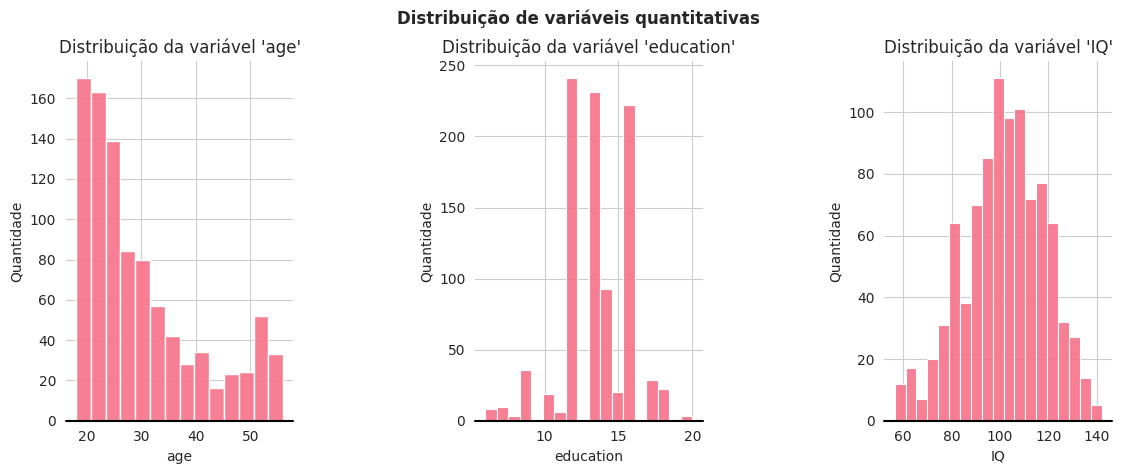

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(quantitatives):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

## 8. Distribuição de sexo para transtornos principais e específicos

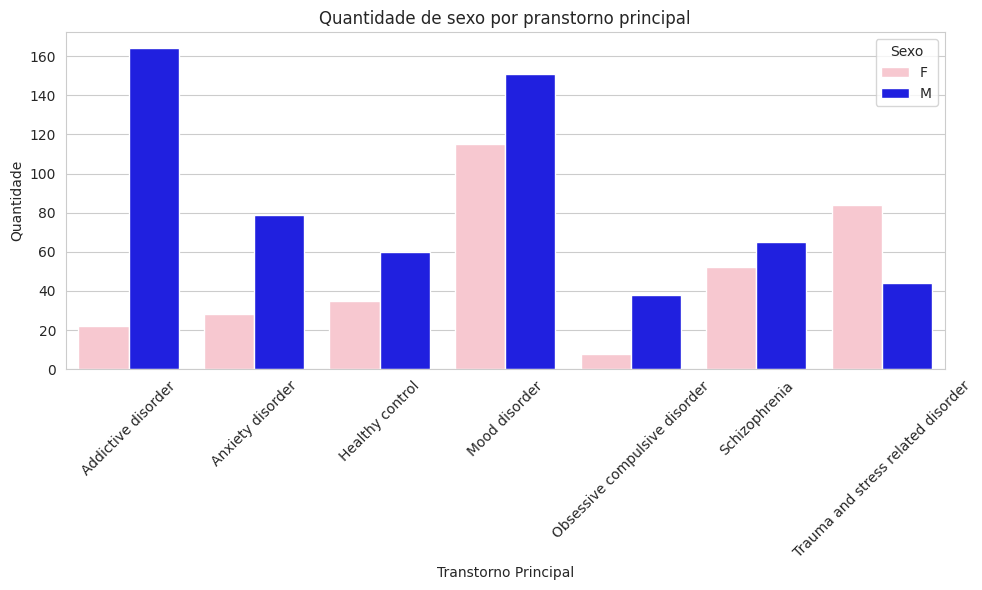

In [59]:
palette = {'M': 'blue', 'F': 'pink'}

count_data = df.groupby(['main.disorder', 'sex']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='main.disorder', y='count', hue='sex', palette=palette, data=count_data)

plt.title('Quantidade de sexo por pranstorno principal')
plt.xlabel('Transtorno Principal')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()

plt.show()

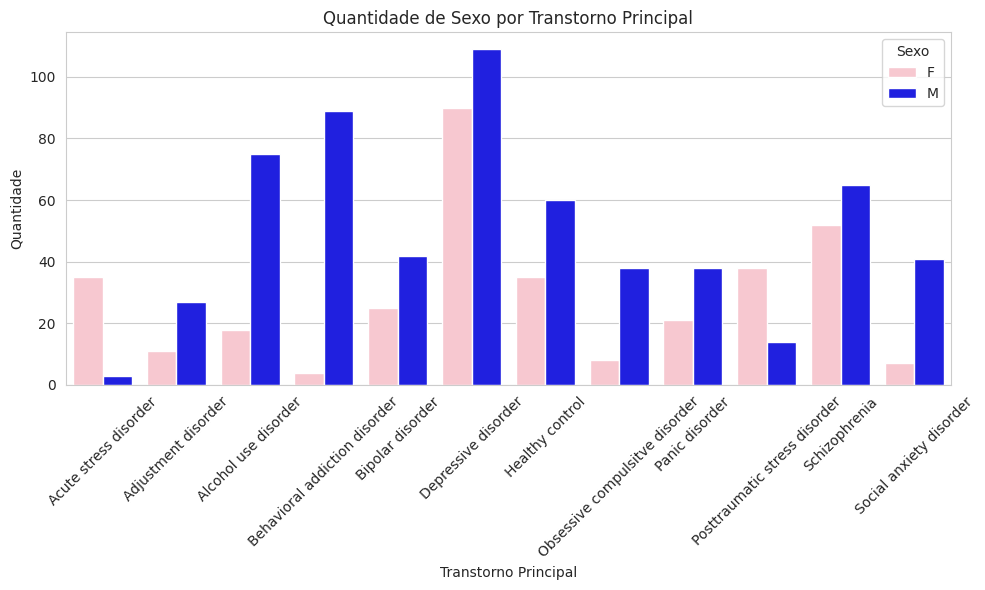

In [60]:
palette = {'M': 'blue', 'F': 'pink'}

count_data = df.groupby(['specific.disorder', 'sex']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='specific.disorder', y='count', hue='sex', palette=palette, data=count_data)

plt.title('Quantidade de Sexo por Transtorno Principal')
plt.xlabel('Transtorno Principal')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()

plt.show()

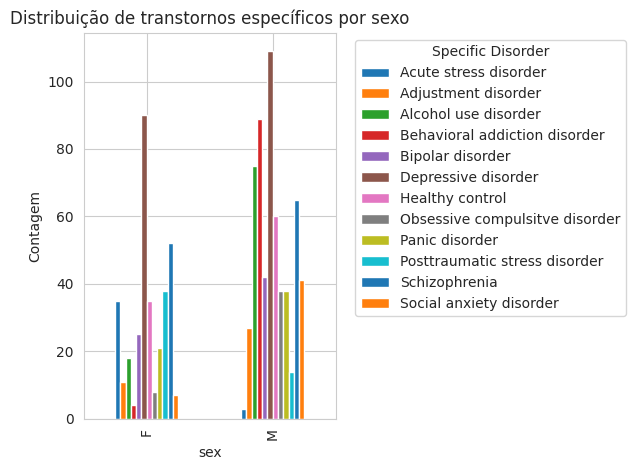

In [61]:
ax = pd.crosstab(df['sex'], df['specific.disorder']).plot(kind='bar', stacked=False)

plt.title('Distribuição de transtornos específicos por sexo')
plt.ylabel('Contagem')

plt.legend(title='Specific Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

## 9. Distribuição do sexo nas variáveis

In [62]:
df_long_quant = df.melt(id_vars="sex", value_vars=quantitatives, 
                  var_name="variable", value_name="value")

df_long_quali = df.melt(id_vars="sex", value_vars=qualitatives, 
                  var_name="variable", value_name="value")

In [63]:
def create_displot(df, x, hue, col, common_bins=False, kde=True, desc=[]):
    g = sns.displot(
        data=df,
        x=x,
        hue=hue,
        col=col,
        kind="hist",
        col_wrap=3,
        common_bins=common_bins,
        kde=kde,
        facet_kws={'sharex': False, 'sharey': False}
    )
    g.set_axis_labels(desc[0], desc[1])  
    g.fig.suptitle(f'Distribuição de {desc[2]} por {desc[3]}', y=1.05)   
    plt.subplots_adjust(top=0.9)   
    plt.show()

### Variáveis quantitativas por sexo

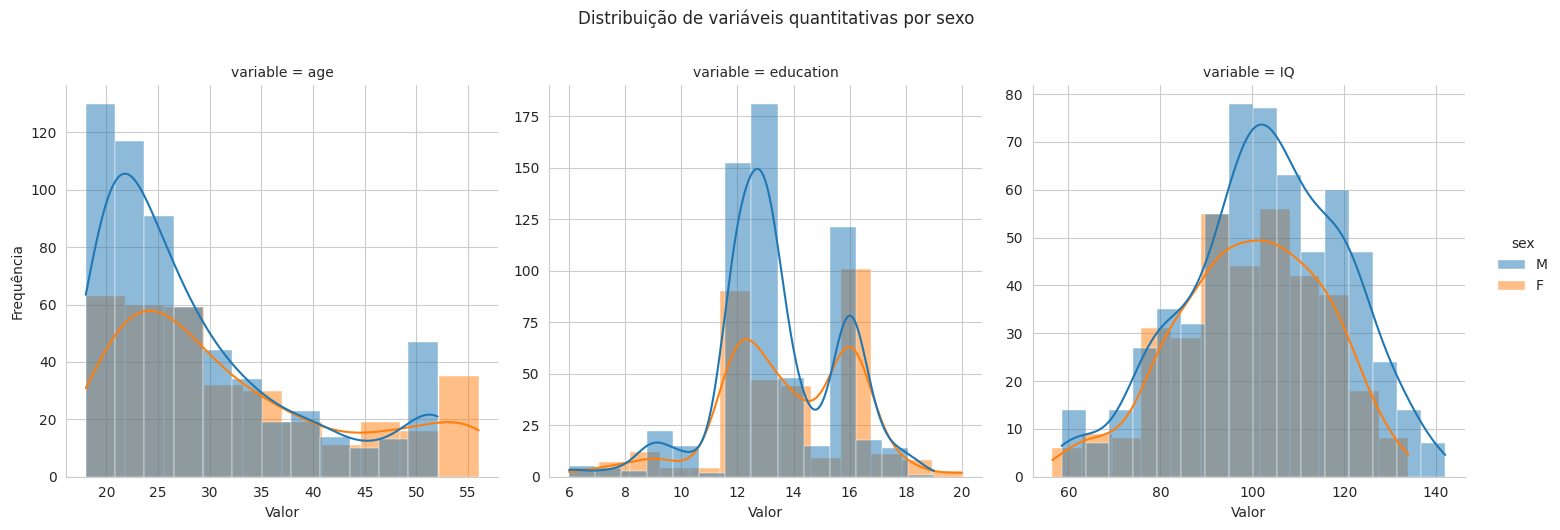

In [64]:
create_displot(df=df_long_quant, 
               x='value', 
               hue='sex', 
               col='variable', 
               common_bins=False, 
               kde=True,
               desc=['Valor', 'Frequência', 'variáveis quantitativas', 'sexo'])

### Idade

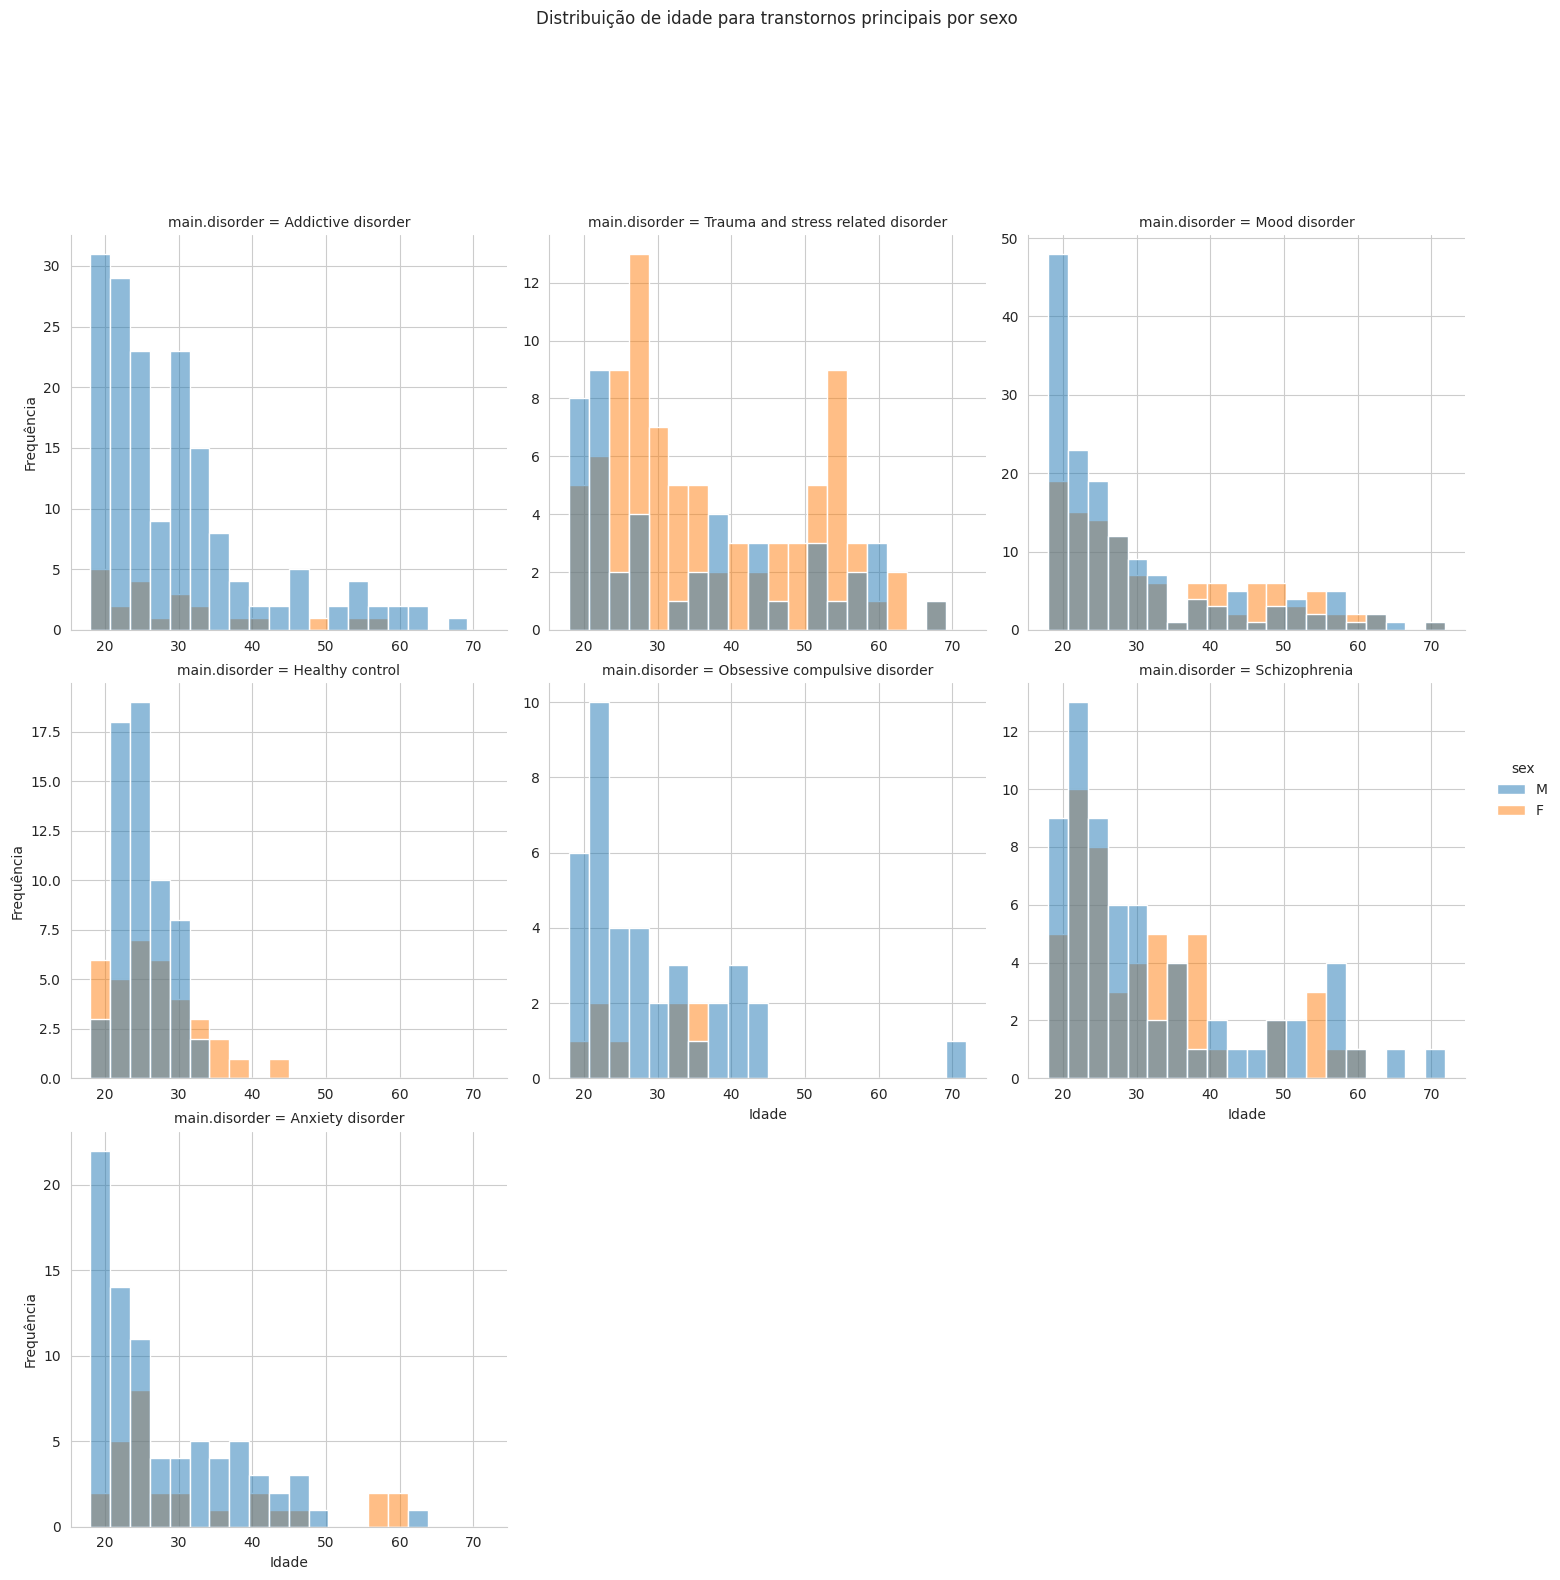

In [66]:
create_displot(df=patients_info, 
               x='age', 
               hue='sex', 
               col='main.disorder', 
               common_bins=True, 
               kde=False,
               desc=['Idade', 'Frequência', 'idade para transtornos principais', 'sexo'])

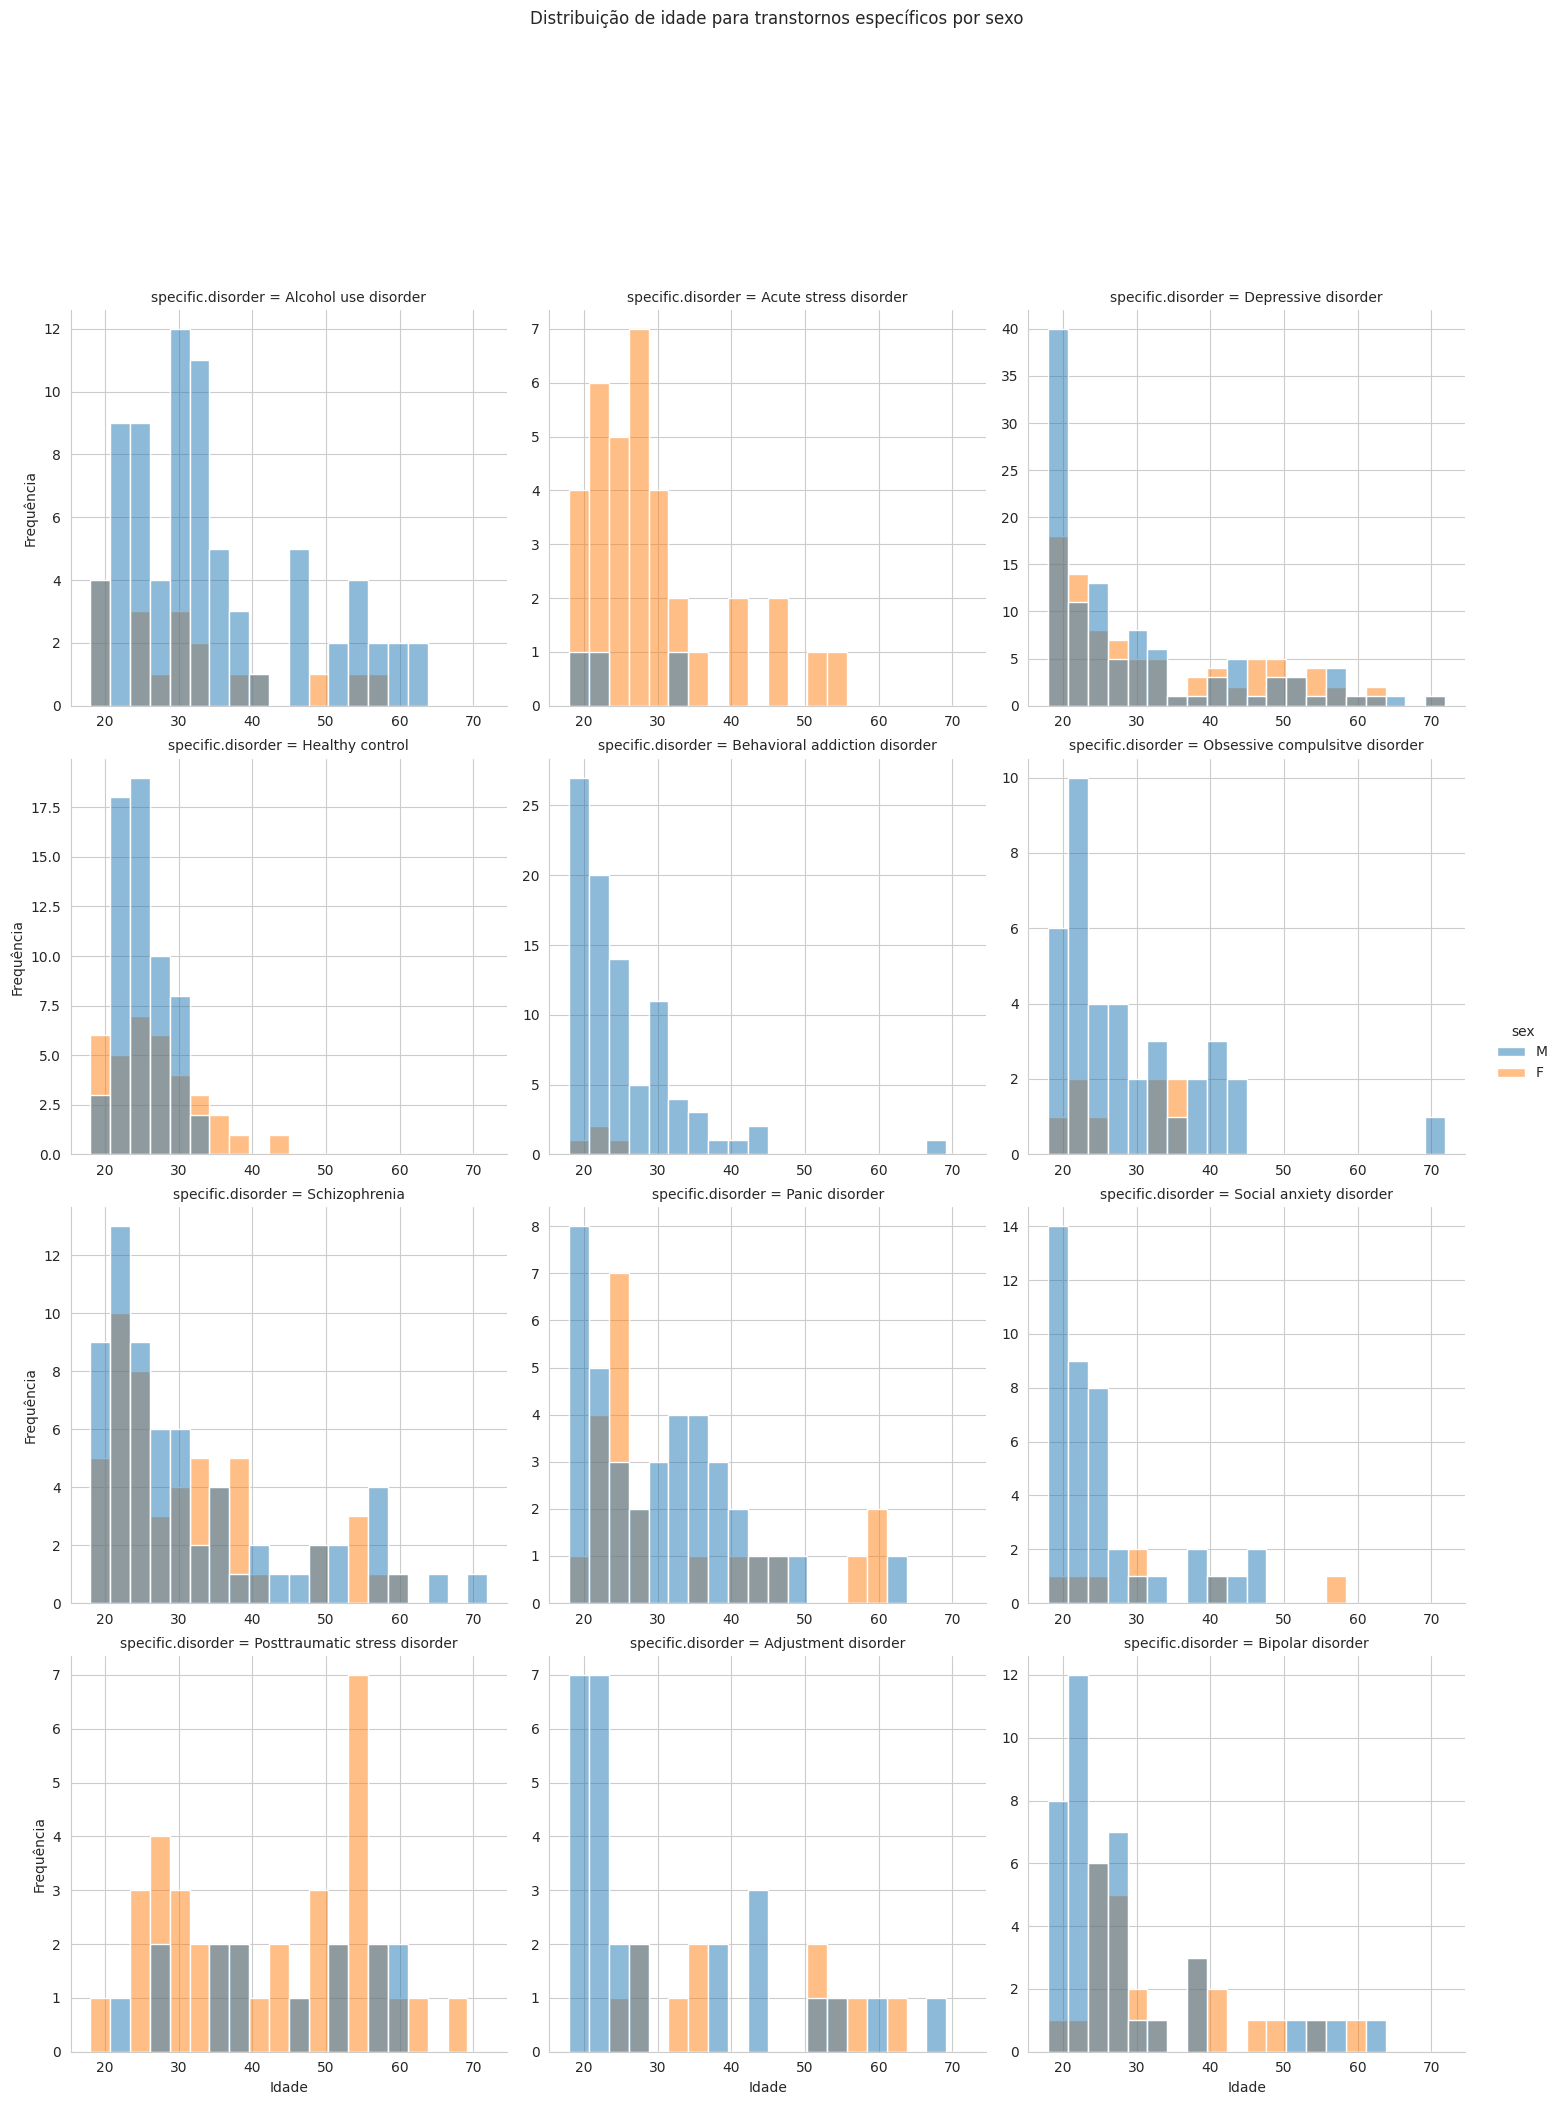

In [67]:
create_displot(df=patients_info, 
               x='age',
               hue='sex',
               col='specific.disorder',
               common_bins=True,
               kde=False,
               desc=['Idade', 'Frequência', 'idade para transtornos específicos', 'sexo'])

### Educação

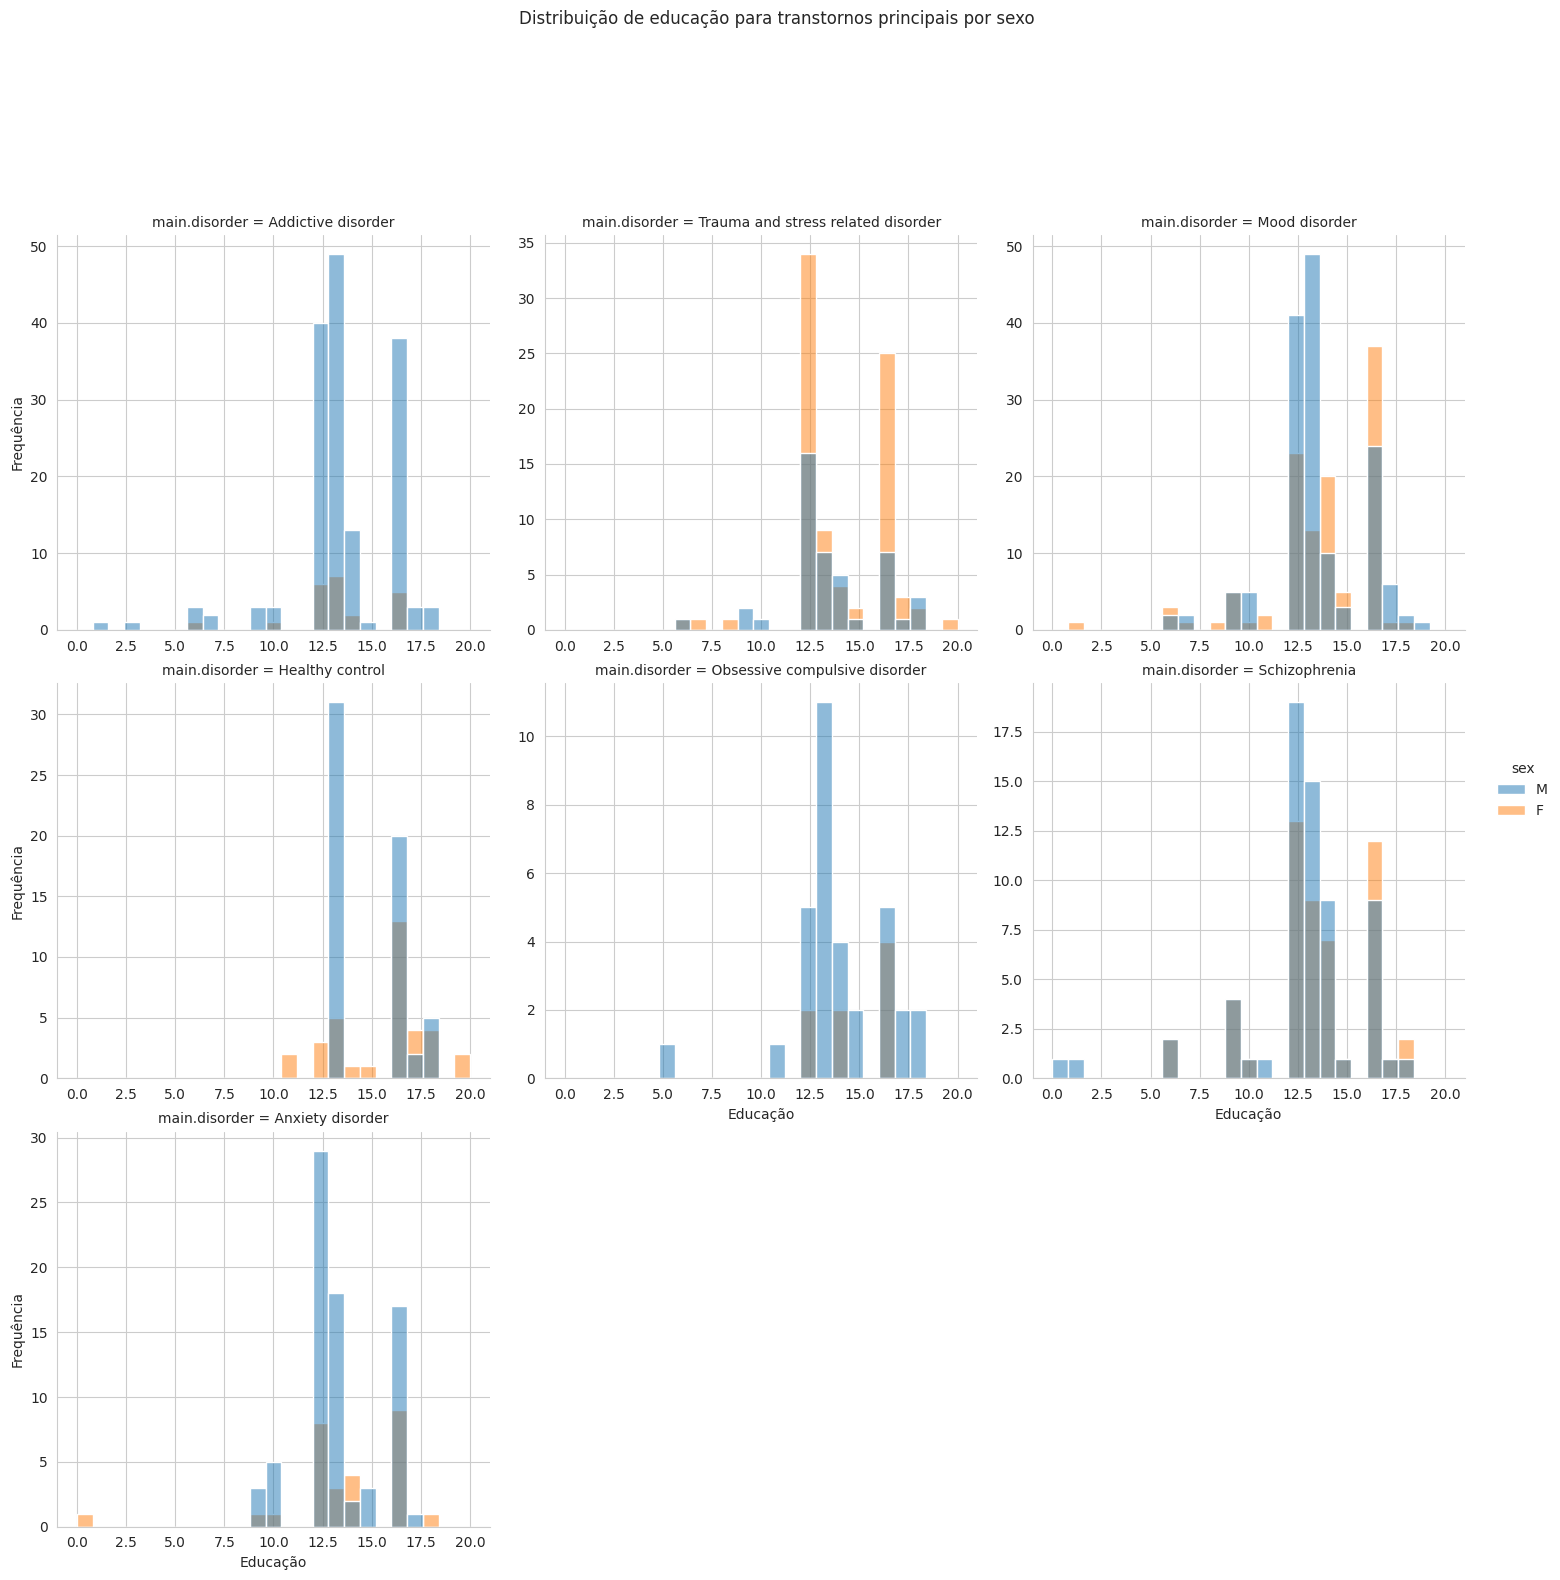

In [68]:
create_displot(df=patients_info,
               x='education',
               hue='sex',
               col='main.disorder',
               common_bins=True,
               kde=False,
               desc=['Educação', 'Frequência', 'educação para transtornos principais', 'sexo'])

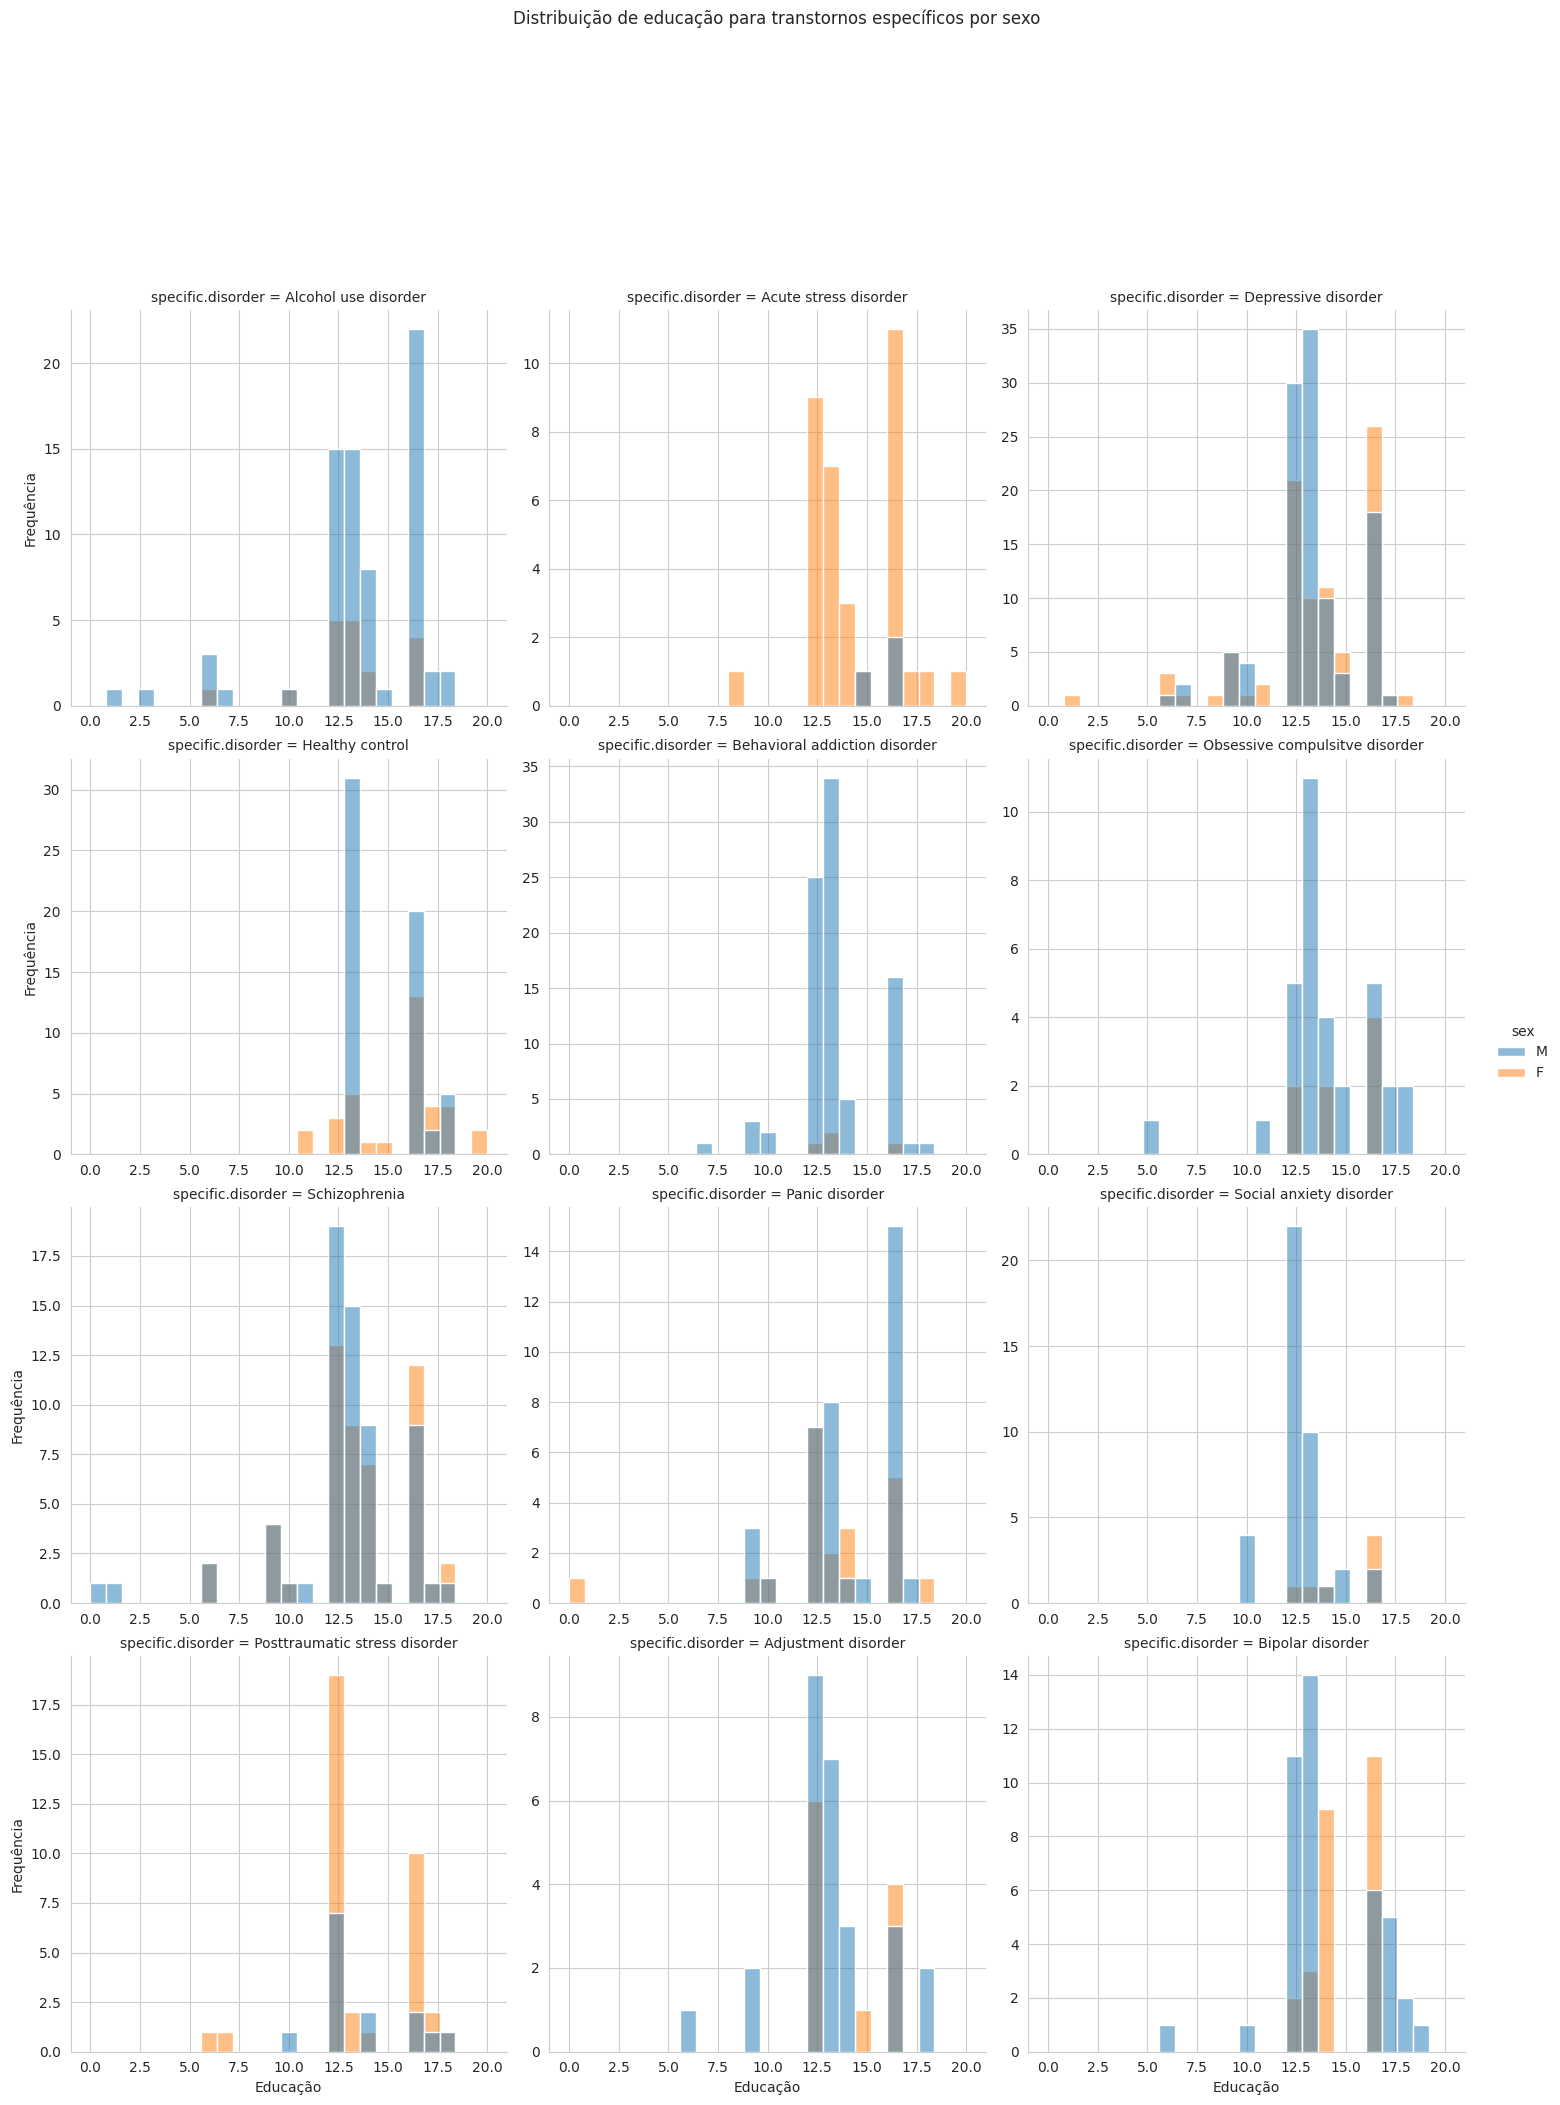

In [69]:
create_displot(df=patients_info,
               x='education',
               hue='sex',
               col='specific.disorder',
               common_bins=True,
               kde=False,
               desc=['Educação', 'Frequência', 'educação para transtornos específicos', 'sexo'])

### QI

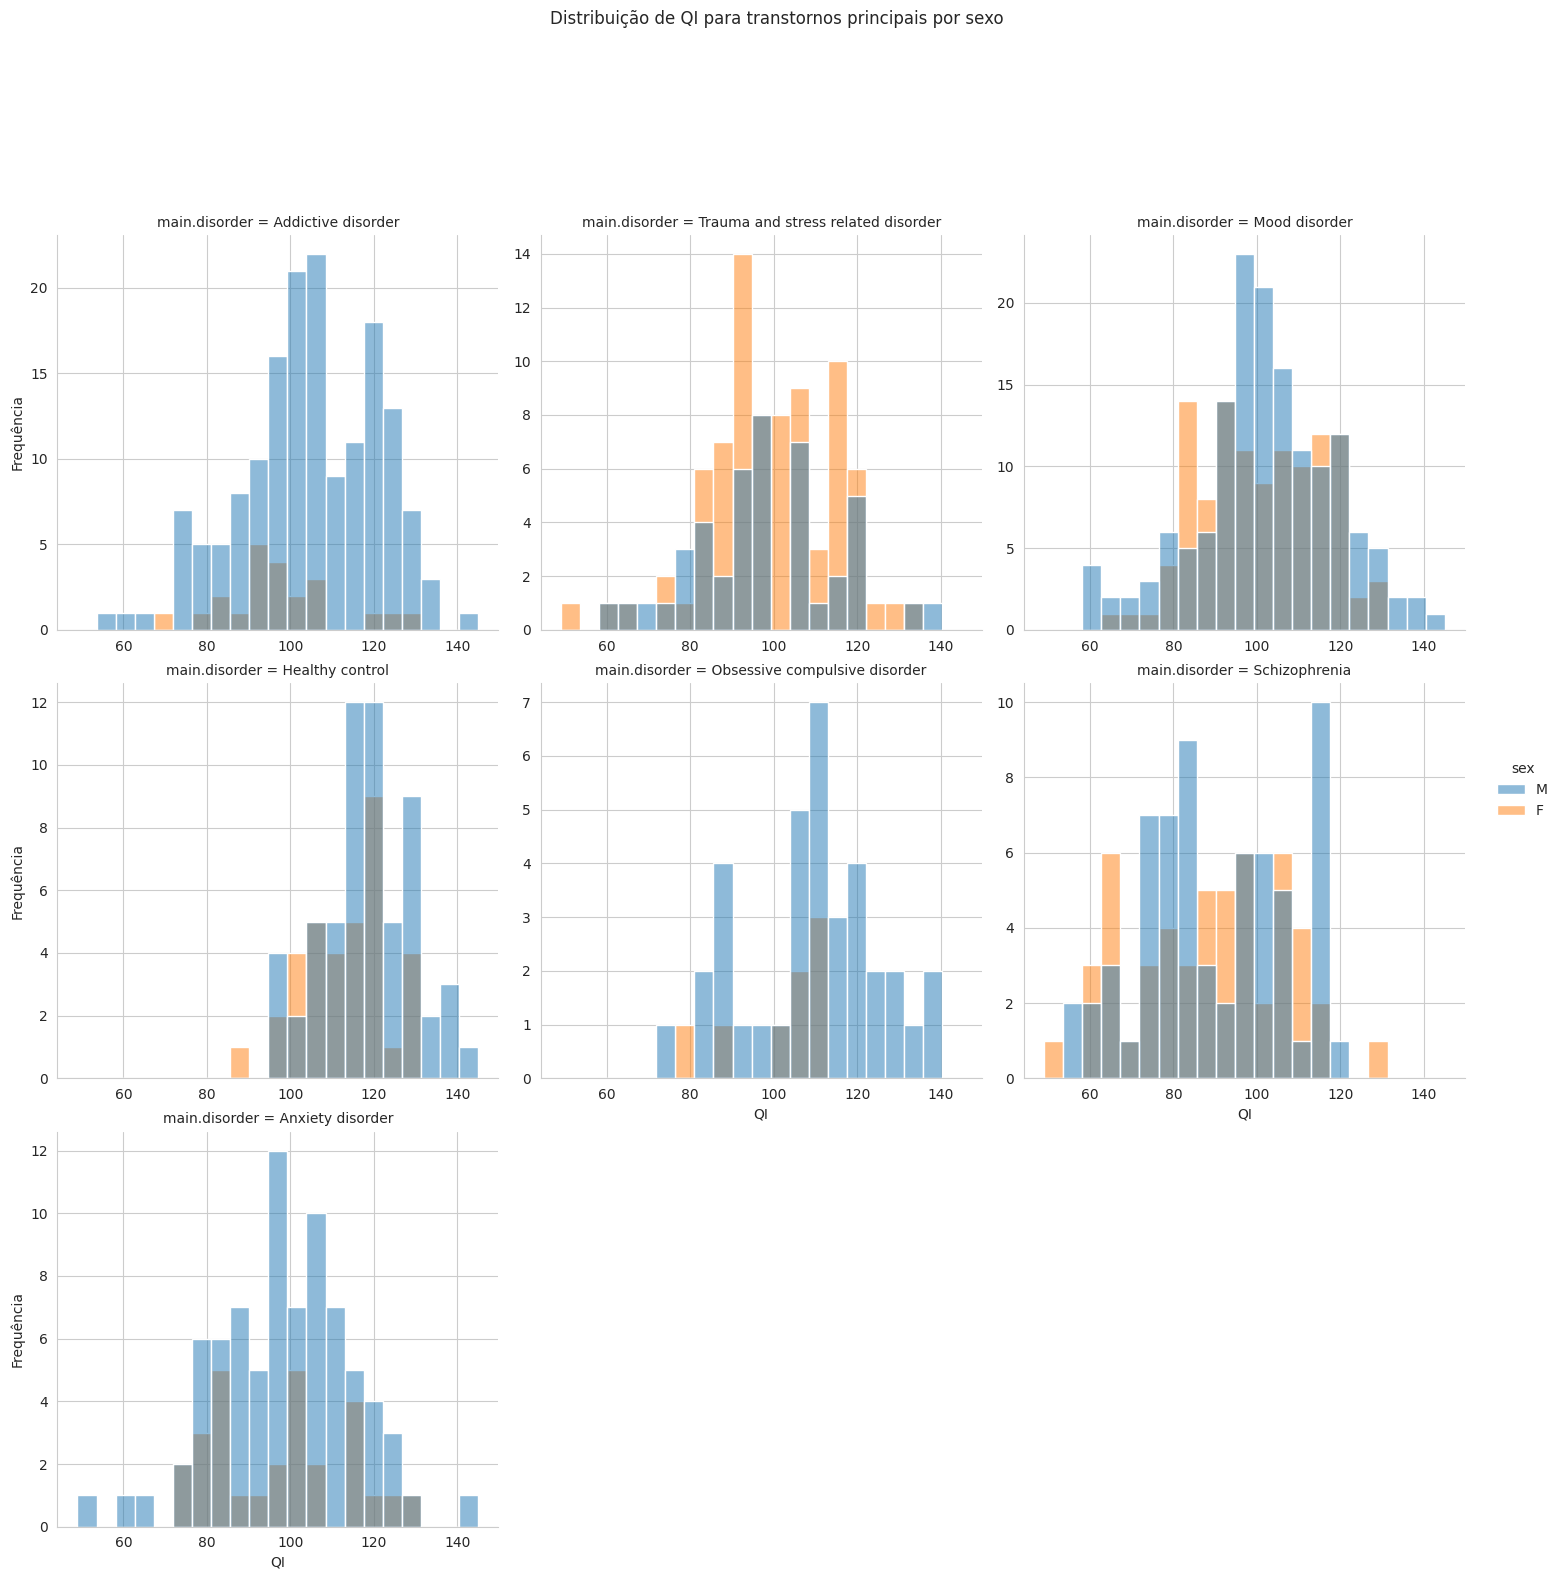

In [70]:
create_displot(df=patients_info,
               x='IQ',
               hue='sex',
               col='main.disorder',
               common_bins=True,
               kde=False,
               desc=['QI', 'Frequência', 'QI para transtornos principais', 'sexo'])

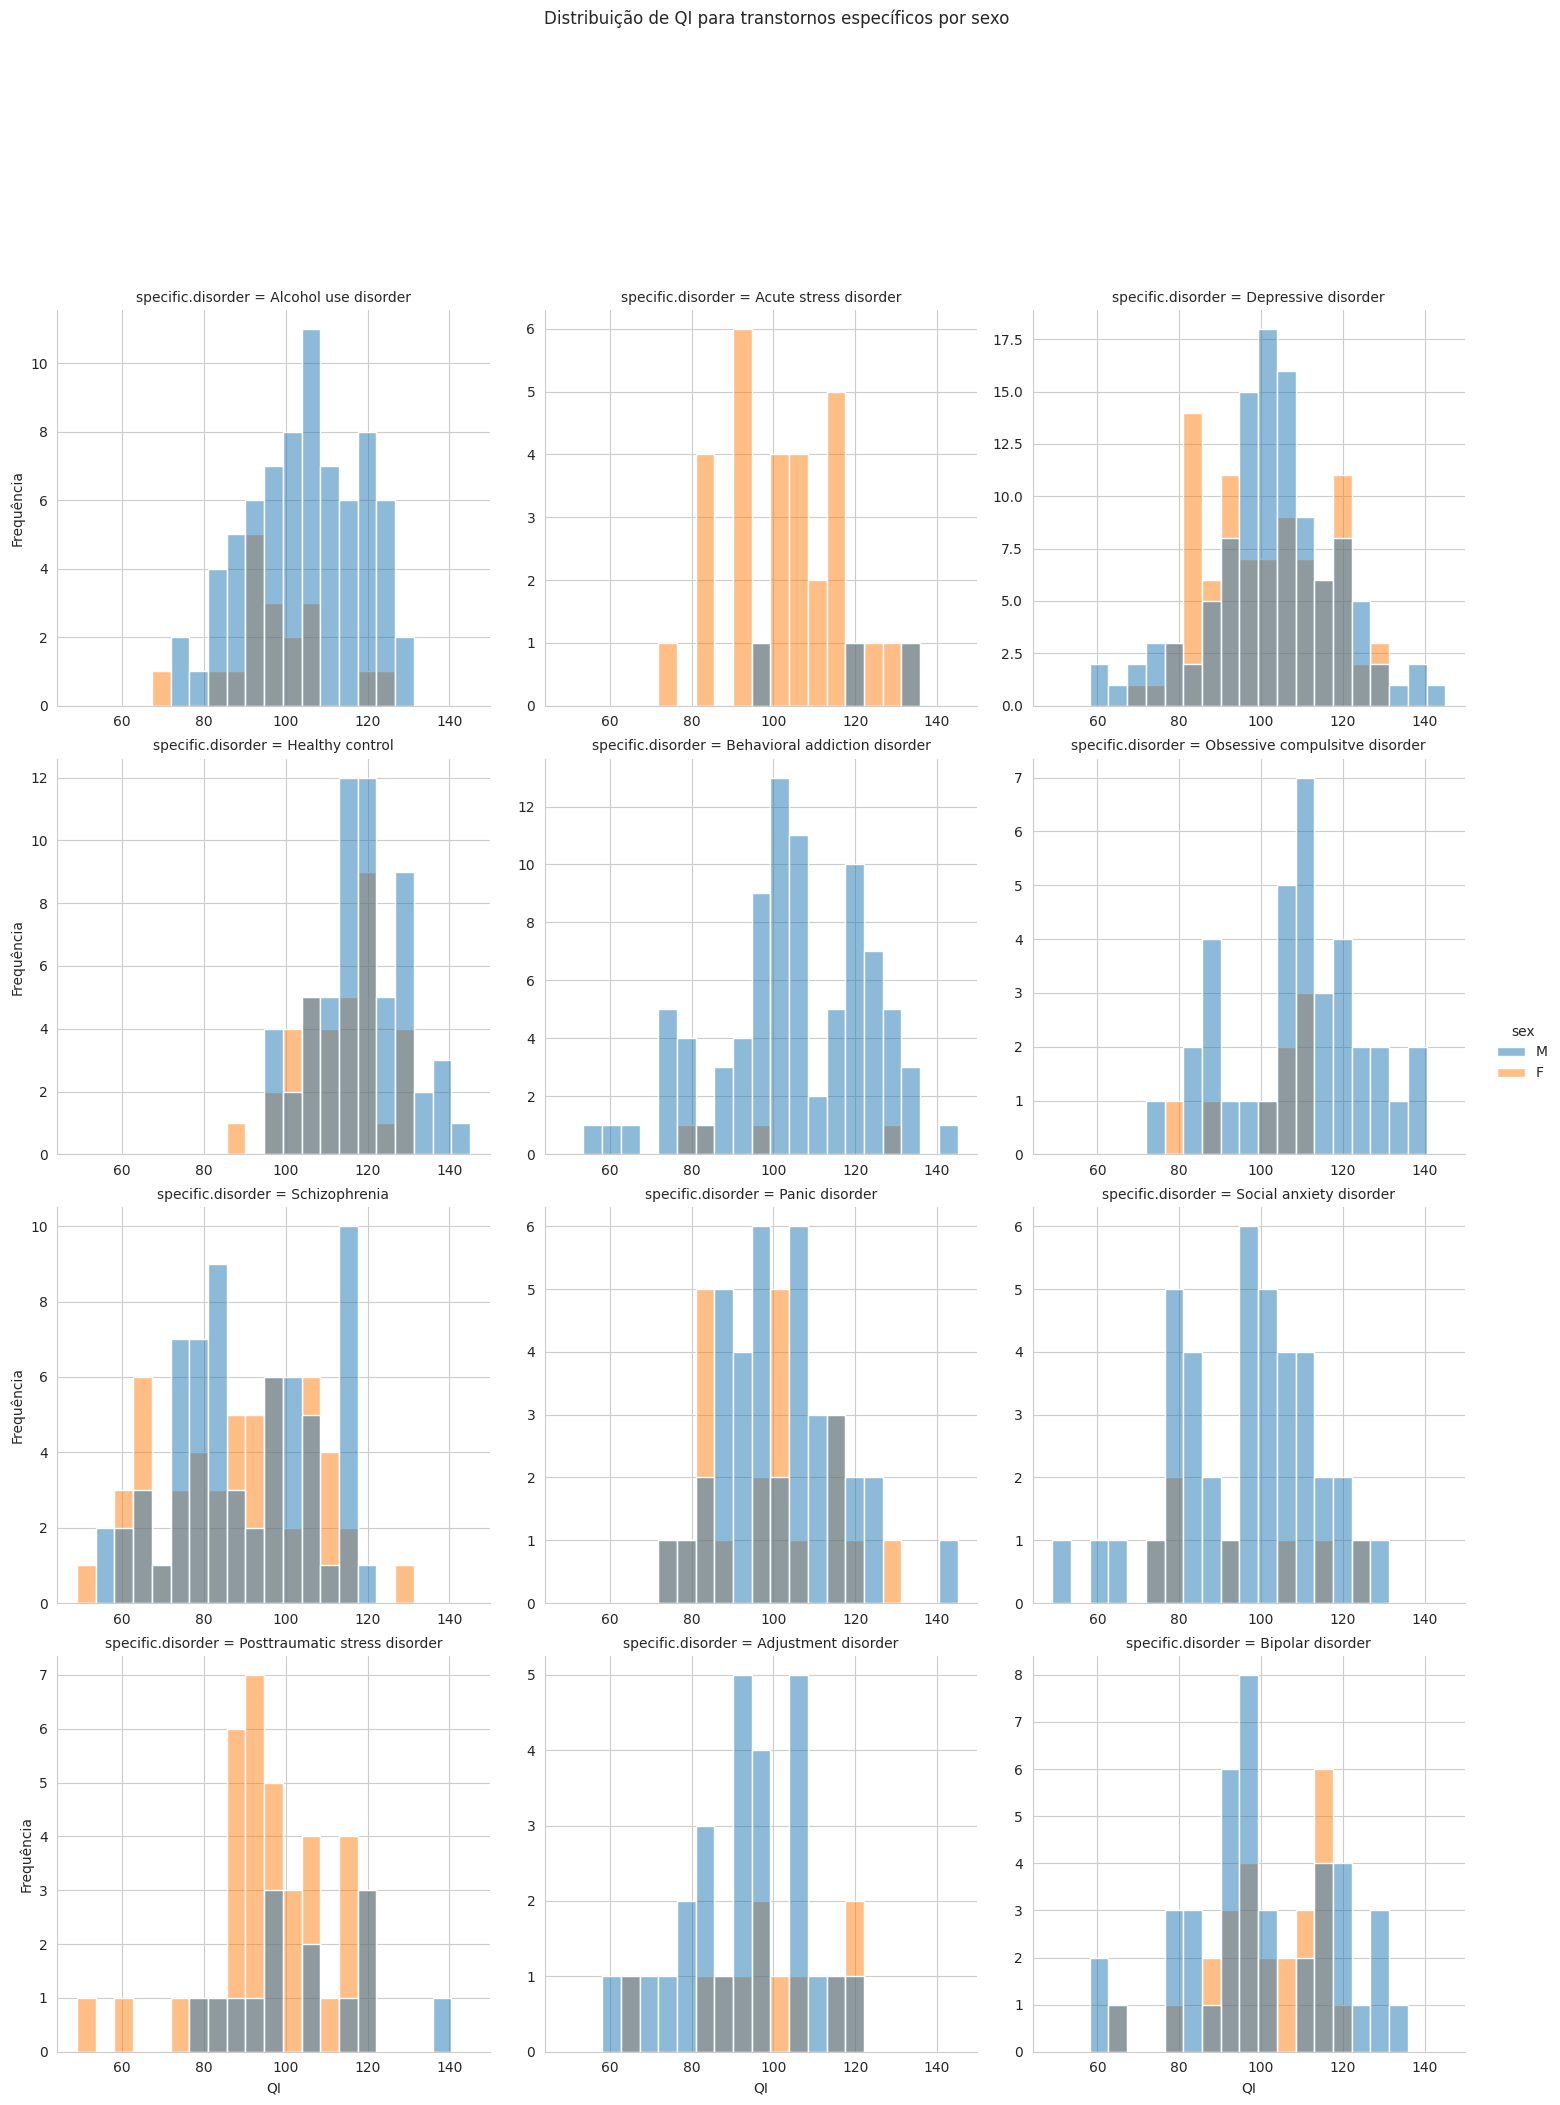

In [71]:
create_displot(df=patients_info,
               x='IQ',
               hue='sex',
               col='specific.disorder',
               common_bins=True,
               kde=False,
               desc=['QI', 'Frequência', 'QI para transtornos específicos', 'sexo'])

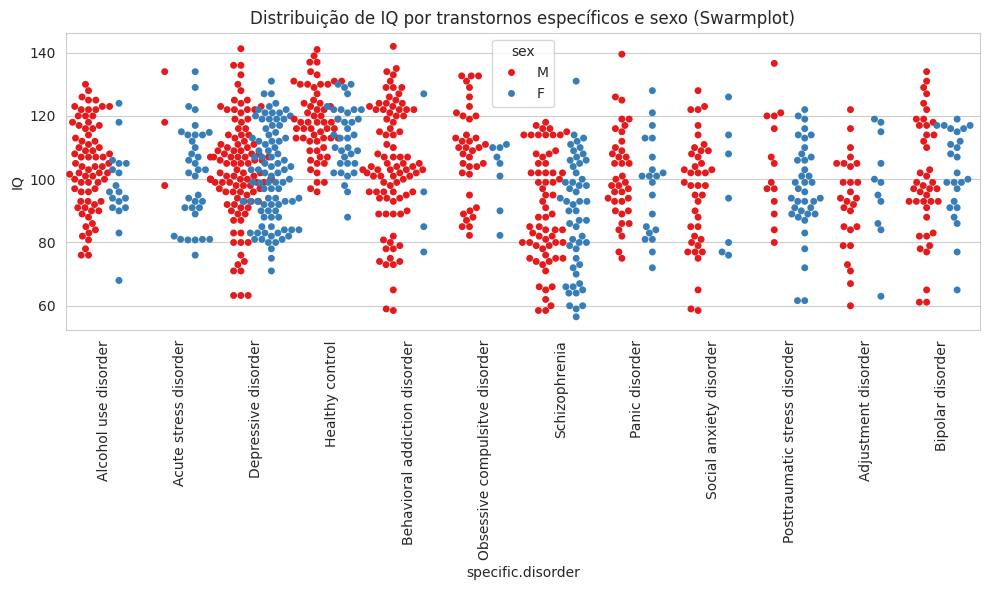

In [72]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='specific.disorder', y='IQ', hue='sex', palette='Set1', dodge=True)

plt.title('Distribuição de IQ por transtornos específicos e sexo (Swarmplot)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## 10. Dispersão Idade e QI

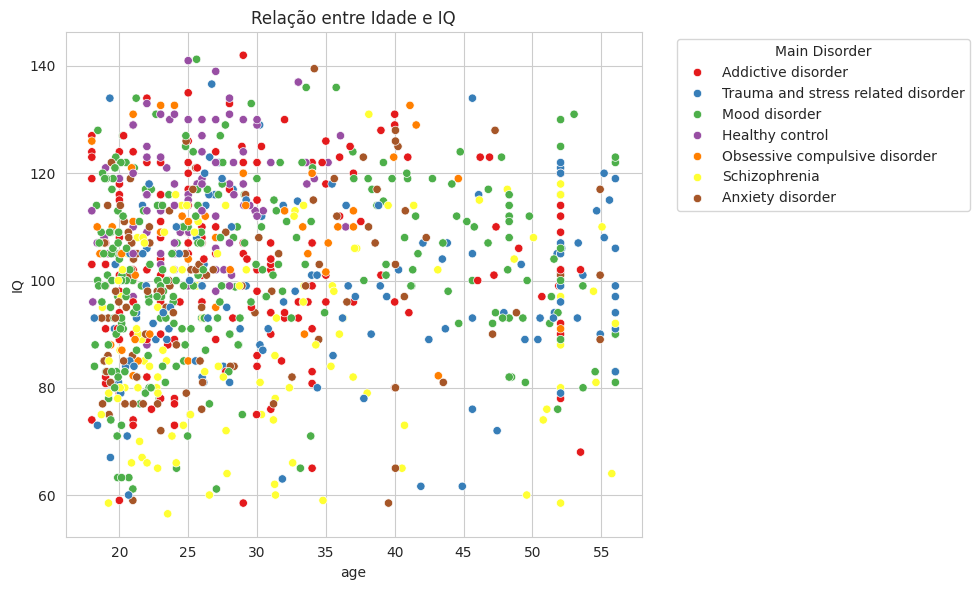

In [73]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data=df, x='age', y='IQ', hue='main.disorder', palette='Set1')

plt.title('Relação entre Idade e IQ')

plt.legend(title='Main Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

## 11. Correlação das variáveis quantitativas

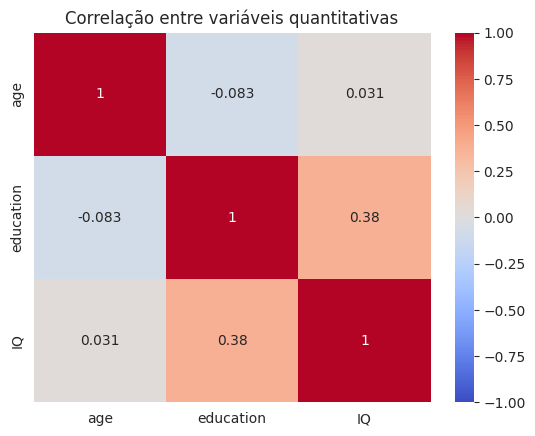

In [74]:
correlation_matrix = df[quantitatives].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre variáveis quantitativas')
plt.show()

## 12. Pair plot variáveis quantitativas 

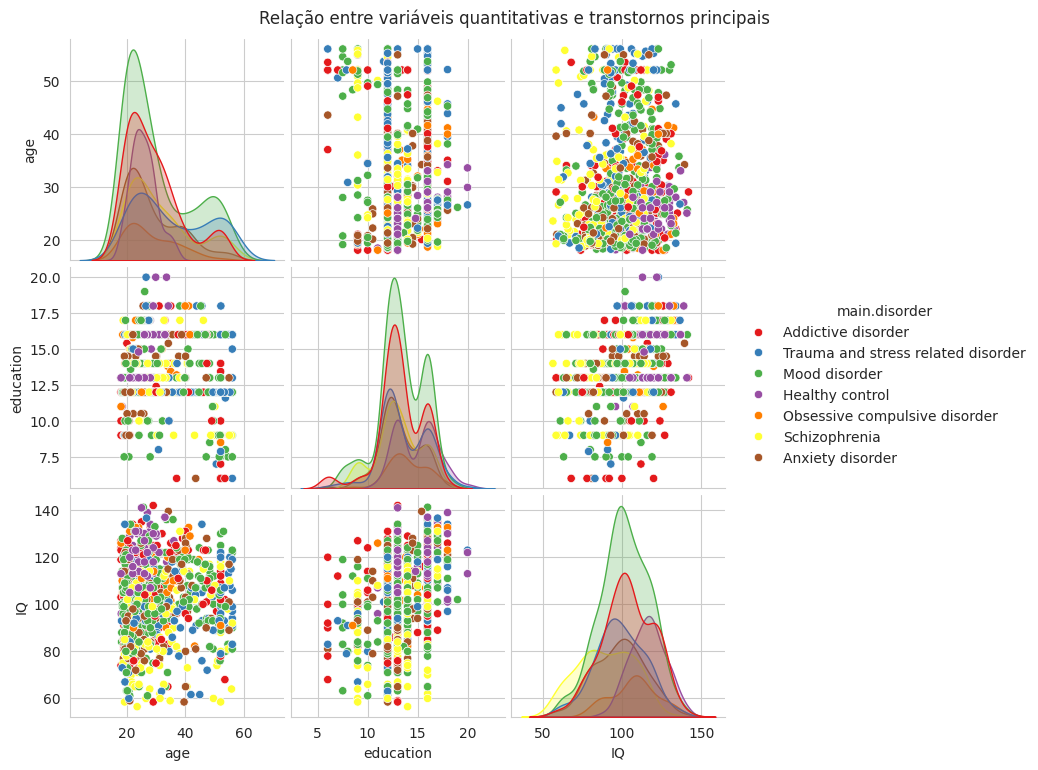

In [75]:
sns.pairplot(df, vars=['age', 'education', 'IQ'], hue='main.disorder', palette='Set1')

plt.suptitle('Relação entre variáveis quantitativas e transtornos principais', y=1.02)
plt.show()

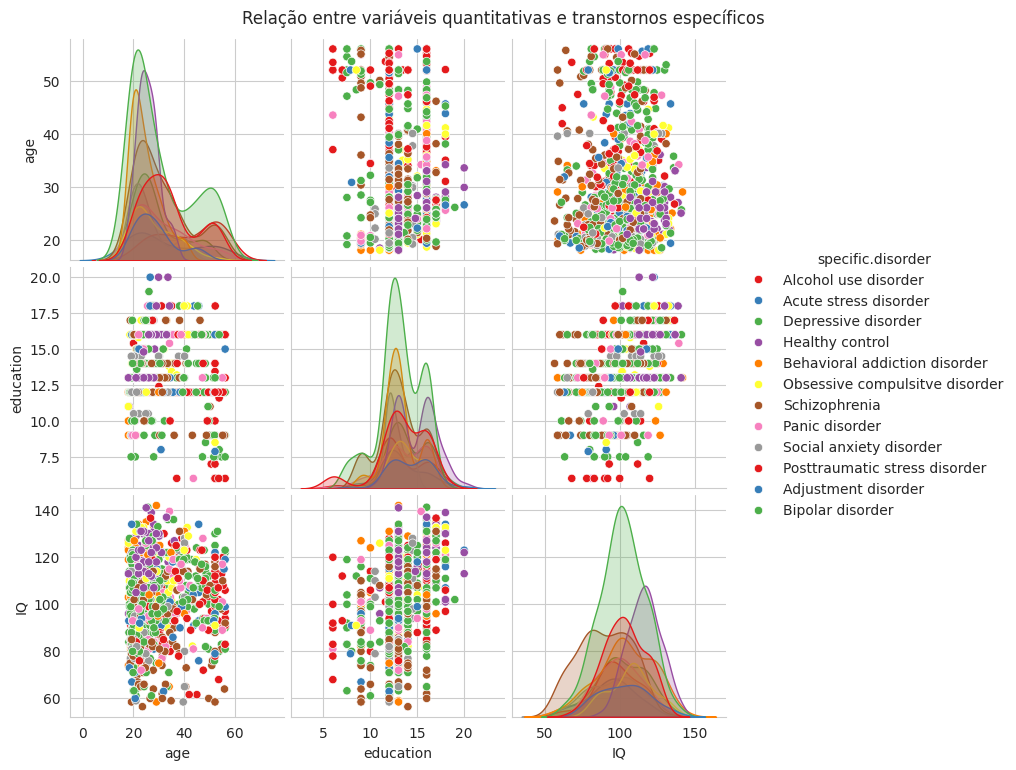

In [76]:
sns.pairplot(df, vars=['age', 'education', 'IQ'], hue='specific.disorder', palette='Set1')

plt.suptitle('Relação entre variáveis quantitativas e transtornos específicos', y=1.02)
plt.show()

In [77]:
fig = px.parallel_categories(df, dimensions=['main.disorder', 'specific.disorder'], color_continuous_scale='Viridis')

fig.update_layout(title='Diagrama paralelo: transtornos principais para transtornos específicos')
fig.show()


## 13. Distribuição de idade para transtornos principais e específicos

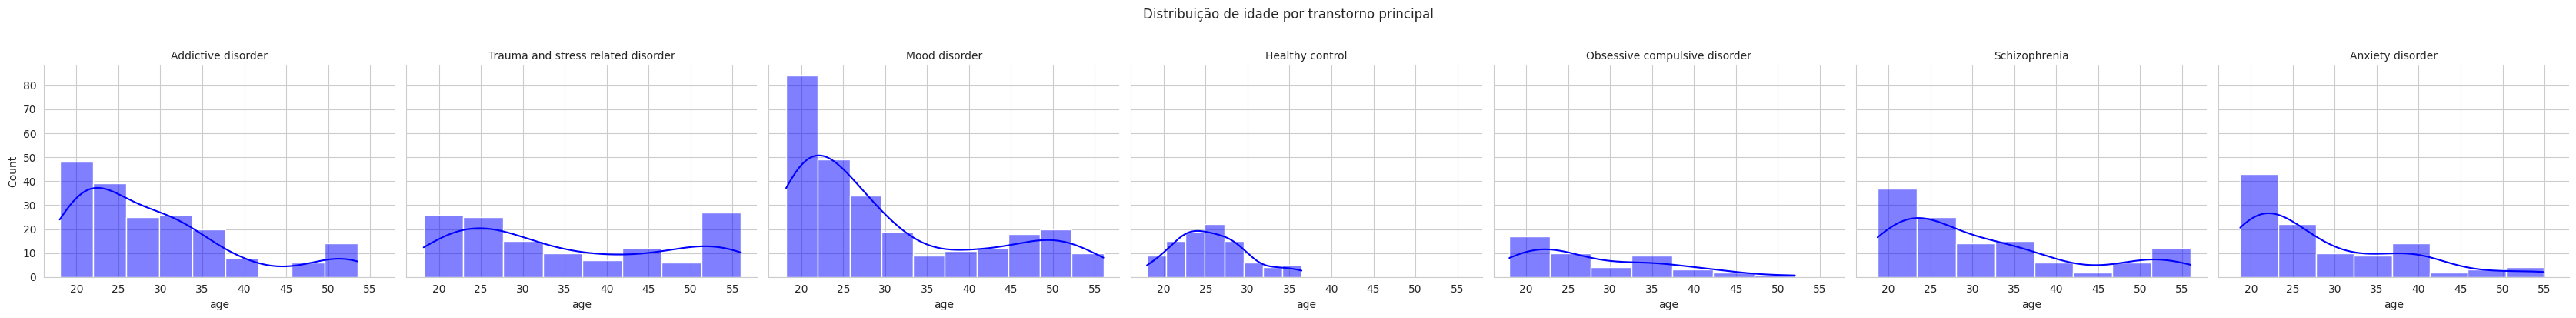

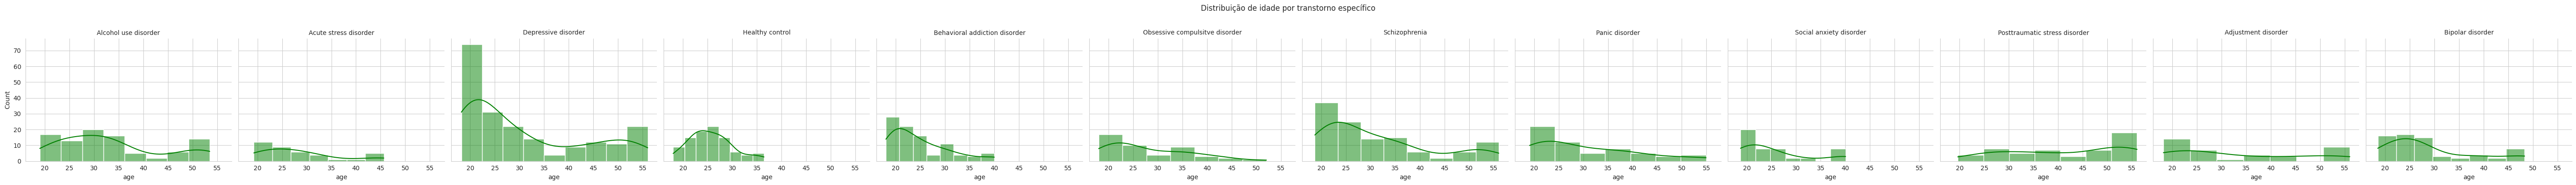

In [78]:
g = sns.FacetGrid(df, col='main.disorder', height=4, aspect=1.2)
g.map(sns.histplot, 'age', kde=True, color='blue')

g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribuição de idade por transtorno principal', y=1.02)
plt.tight_layout()
plt.show()

g = sns.FacetGrid(df, col='specific.disorder', height=4, aspect=1.2)
g.map(sns.histplot, 'age', kde=True, color='green')

g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribuição de idade por transtorno específico', y=1.02)
plt.tight_layout()
plt.show()


## 14. Análise temporal ano e mês dos transtornos principais e específicos

In [79]:
df['eeg.date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 945 entries, 0 to 944
Series name: eeg.date
Non-Null Count  Dtype 
--------------  ----- 
945 non-null    object
dtypes: object(1)
memory usage: 7.5+ KB


In [80]:
df['eeg.date'].head()

0     2012.8.30
1      2012.9.6
2     2012.9.10
3     2012.10.8
4    2012.10.18
Name: eeg.date, dtype: object

In [81]:
## Convertendo a coluna 'eeg.date' para o formato datetime

old_date = df['eeg.date']

df['eeg.date'] = df['eeg.date'].str.split(' ').str[0]

df['eeg.date'] = pd.to_datetime(df['eeg.date'], errors='coerce')

In [82]:
(old_date == df['eeg.date']).value_counts()

eeg.date
True    945
Name: count, dtype: int64

In [83]:
df['eeg.date'].head()

0   2012-08-30
1   2012-09-06
2   2012-09-10
3   2012-10-08
4   2012-10-18
Name: eeg.date, dtype: datetime64[ns]

In [84]:
df['eeg.date'].dt.year

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
940    2014
941    2014
942    2014
943    2014
944    2015
Name: eeg.date, Length: 945, dtype: int32

In [85]:
df['year'] = df['eeg.date'].dt.year
df['month'] = df['eeg.date'].dt.to_period('M')

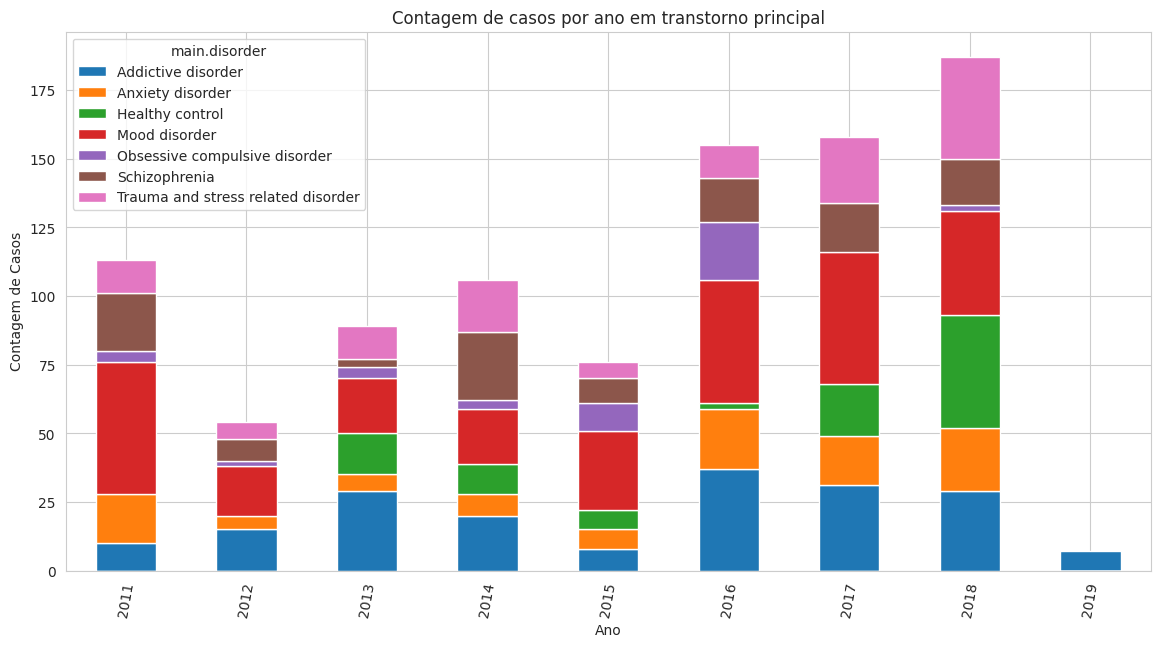

In [86]:
yearly_counts_main = df.groupby(['year', 'main.disorder']).size().unstack()

yearly_counts_main.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Contagem de casos por ano em transtorno principal')
plt.ylabel('Contagem de Casos')
plt.xlabel('Ano')
plt.xticks(rotation=80)
plt.show()


In [87]:
yearly_counts_main

main.disorder  Addictive disorder  Anxiety disorder  Healthy control  \
year                                                                   
2011                         10.0              18.0              NaN   
2012                         15.0               5.0              NaN   
2013                         29.0               6.0             15.0   
2014                         20.0               8.0             11.0   
2015                          8.0               7.0              7.0   
2016                         37.0              22.0              2.0   
2017                         31.0              18.0             19.0   
2018                         29.0              23.0             41.0   
2019                          7.0               NaN              NaN   

main.disorder  Mood disorder  Obsessive compulsive disorder  Schizophrenia  \
year                                                                         
2011                    48.0                            4.0           21.0   
2012                    18.0                            2.0            8.0   
2013                    20.0                            4.0            3.0   
2014                    20.0                            3.0           25.0   
2015                    29.0                           10.0            9.0   
2016                    45.0                           21.0           16.0   
2017                    48.0                            NaN           18.0   
2018                    38.0                            2.0           17.0   
2019                     NaN                            NaN            NaN   

main.disorder  Trauma and stress related disorder  
year                                               
2011                                         12.0  
2012                                          6.0  
2013                                         12.0  
2014                                         19.0  
2015                                          6.0  
2016                                         12.0  
2017                                         24.0  
2018                                         37.0  
2019                                          NaN

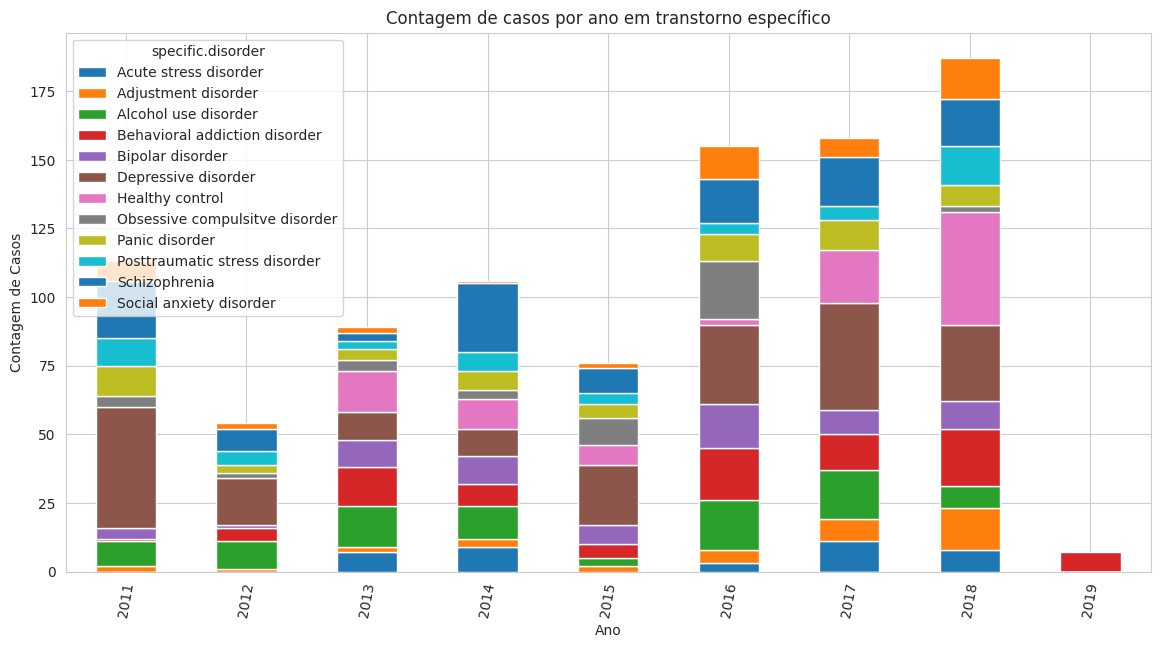

In [88]:
yearly_counts_speci = df.groupby(['year', 'specific.disorder']).size().unstack()

yearly_counts_speci.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Contagem de casos por ano em transtorno específico')
plt.ylabel('Contagem de Casos')
plt.xlabel('Ano')
plt.xticks(rotation=80)
plt.show()

In [89]:
yearly_counts_speci

specific.disorder  Acute stress disorder  Adjustment disorder  \
year                                                            
2011                                 NaN                  2.0   
2012                                 NaN                  1.0   
2013                                 7.0                  2.0   
2014                                 9.0                  3.0   
2015                                 NaN                  2.0   
2016                                 3.0                  5.0   
2017                                11.0                  8.0   
2018                                 8.0                 15.0   
2019                                 NaN                  NaN   

specific.disorder  Alcohol use disorder  Behavioral addiction disorder  \
year                                                                     
2011                                9.0                            1.0   
2012                               10.0                            5.0   
2013                               15.0                           14.0   
2014                               12.0                            8.0   
2015                                3.0                            5.0   
2016                               18.0                           19.0   
2017                               18.0                           13.0   
2018                                8.0                           21.0   
2019                                NaN                            7.0   

specific.disorder  Bipolar disorder  Depressive disorder  Healthy control  \
year                                                                        
2011                            4.0                 44.0              NaN   
2012                            1.0                 17.0              NaN   
2013                           10.0                 10.0             15.0   
2014                           10.0                 10.0             11.0   
2015                            7.0                 22.0              7.0   
2016                           16.0                 29.0              2.0   
2017                            9.0                 39.0             19.0   
2018                           10.0                 28.0             41.0   
2019                            NaN                  NaN              NaN   

specific.disorder  Obsessive compulsitve disorder  Panic disorder  \
year                                                                
2011                                          4.0            11.0   
2012                                          2.0             3.0   
2013                                          4.0             4.0   
2014                                          3.0             7.0   
2015                                         10.0             5.0   
2016                                         21.0            10.0   
2017                                          NaN            11.0   
2018                                          2.0             8.0   
2019                                          NaN             NaN   

specific.disorder  Posttraumatic stress disorder  Schizophrenia  \
year                                                              
2011                                        10.0           21.0   
2012                                         5.0            8.0   
2013                                         3.0            3.0   
2014                                         7.0           25.0   
2015                                         4.0            9.0   
2016                                         4.0           16.0   
2017                                         5.0           18.0   
2018                                        14.0           17.0   
2019                                         NaN            NaN   

specific.disorder  Social anxiety disorder  
year                                        
2011                             

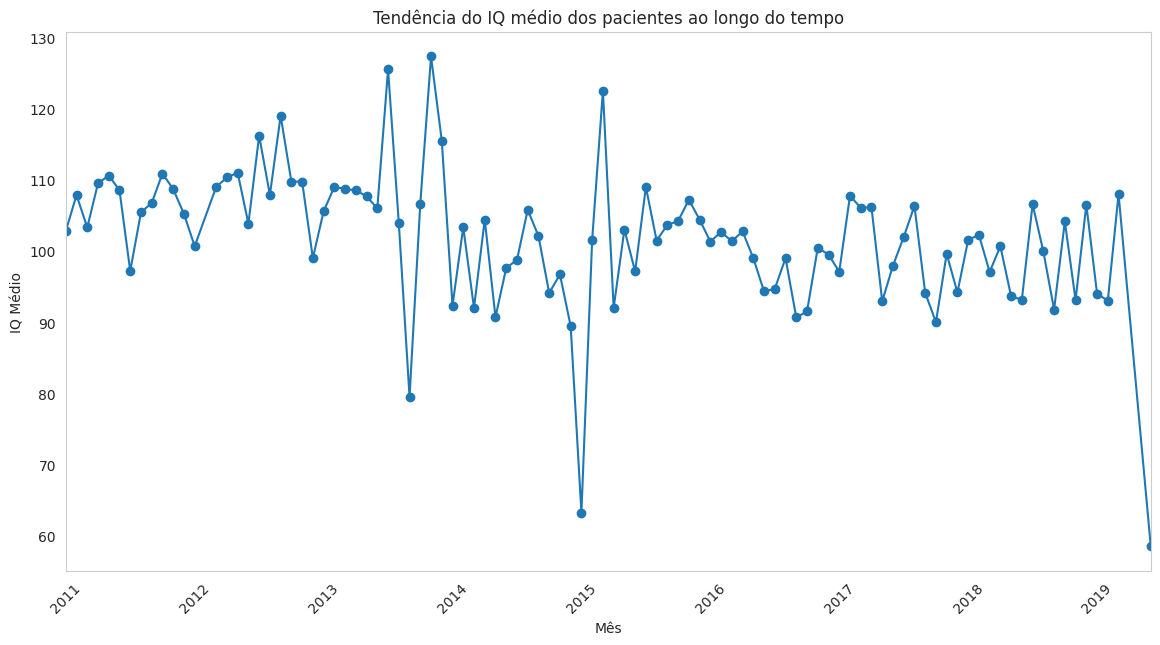

In [90]:
iq_trend = df.groupby('month')['IQ'].mean()

plt.figure(figsize=(14, 7))
iq_trend.plot(kind='line', marker='o')
plt.title('Tendência do IQ médio dos pacientes ao longo do tempo')
plt.ylabel('IQ Médio')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.grid()
plt.show()


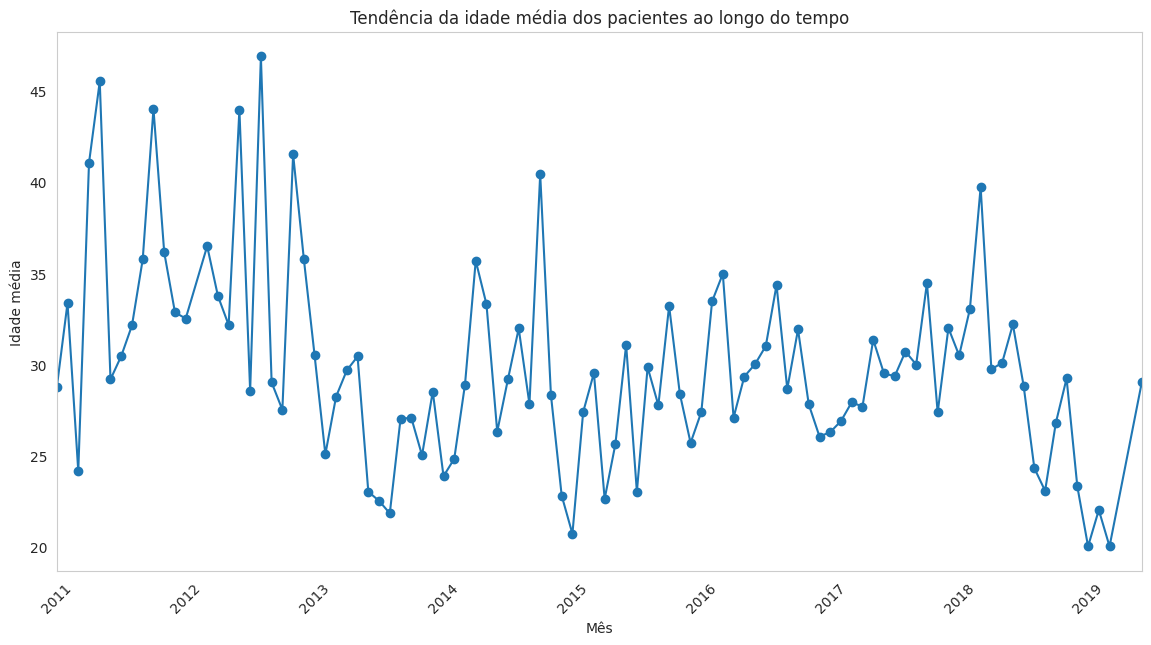

In [91]:
age_trend = df.groupby('month')['age'].mean()

plt.figure(figsize=(14, 7))
age_trend.plot(kind='line', marker='o')
plt.title('Tendência da idade média dos pacientes ao longo do tempo')
plt.ylabel('Idade média')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [92]:
df.columns

Index(['sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7',
       ...
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2', 'year', 'month'],
      dtype='object', length=1149)

In [93]:
df = df.drop(columns=['year', 'month'])